#Arc 1
$\{u_i(t), f_i(t)\}$


In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 28.2 MB/s 
     |████████████████████████████████| 182 kB 53.9 MB/s 
     |████████████████████████████████| 162 kB 69.2 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 162 kB 74.6 MB/s 
     |████████████████████████████████| 158 kB 64.9 MB/s 
     |████████████████████████████████| 157 kB 71.1 MB/s 
     |████████████████████████████████| 157 kB 67.3 MB/s 
     |████████████████████████████████| 157 kB 75.7 MB/s 
     |████████████████████████████████| 157 kB 71.9 MB/s 
     |████████████████████████████████| 157 kB 71.7 MB/s 
     |████████████████████████████████| 157 kB 69.6 MB/s 
     |████████████████████████████████| 157 kB 70.5 MB/s 
     |████████████████████████████████| 156 kB 72.8 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import time
from tqdm.notebook import tqdm
import torch.optim as optim
import wandb

wandb.login()
plt.style.use('seaborn-pastel')



gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
print(torch.backends.cudnn.deterministic == True)
print(torch.backends.cudnn.benchmark == False)

T = 20
t_0 = 0
M = 1000
N = 1000
epsilon = 10**(-2)
tau = (T - t_0)/M
t = np.arange(t_0, T, tau)
t = np.append(t, T)
a = 0
b = 20
h = (b - a)/N
x_mesh = np.arange(a, b, h)
x_mesh = np.append(x_mesh, b)

k = [22000]
q = np.zeros((sum(k), N + 1))
d = 0
for j in range(len(k)):
    file_q = open('/content/drive/My Drive/Biophys/q_exp_less_alpha.txt','r')
    for i in range(k[j]):
        s = 0
        line = file_q.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                # print(num)
                q[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_q.close()
y = q
print('q readed')
f1 = np.zeros((3*sum(k), M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/f_modulated.txt','r')
    for i in range(3*k[j]):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                f1[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
print('f_ID readed')
x1 = f1

u_interp = np.zeros((3*sum(k), M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/u_interp_model2.txt','r')
    for i in range(3*k[j]):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_interp[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
x2 = u_interp
print('u_interp readed')
d = 0
f_test = np.zeros((3, N + 1))
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/f_test2.txt','r')
    for i in range(3):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                f_test[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
u_test = np.zeros((3, N + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/u_interp_model_test2.txt','r')
    for i in range(3):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_test[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()

x = np.zeros((sum(k)*3, 2 * (M + 1)))
y = np.zeros((sum(k)*3, N + 1))
test = np.zeros((3, 2 * (M + 1)))
for i in range(sum(k)*3):
  x[i, 0:M + 1] = x1[i]
  x[i, M + 1:2*M + 2] = x2[i]
for i in range(3):
  test[i, 0:M + 1] = f_test[i]
  test[i, M + 1:2*M + 2] = u_test[i]
for i in range(sum(k)*3):
  y[i] = q[i//3]

Mounted at /content/drive


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Is the GPU available? True
True
True
q readed
f_ID readed
u_interp readed


In [ ]:
wandb.finish()
FLAGS = {}
filepath = r"/content/drive/My Drive/Biophys/model_Bio.txt"
filepath2 = r"/content/drive/My Drive/Biophys/model_Bio_2.txt"
filepath3 = r"/content/drive/My Drive/Biophys/model_Bio_3.txt"
FLAGS['batch_size'] = 1000
FLAGS['learning_rate'] = 0.0000001
FLAGS['momentum'] = 0.5
FLAGS['num_epochs'] = 2000
FLAGS['log_steps'] = 30
FLAGS['metrics_debug'] = False
sparsity_coeff = 20
N_sp = int(N/sparsity_coeff)
wandb.init(
      # Set the project where this run will be logged
      project="Bio",
      entity="goraled",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"1 Default",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": FLAGS['learning_rate'],
      "architecture": "First type",
      "dataset": "K = 20.000",
      "epochs": FLAGS['num_epochs'],
      "batch_size": FLAGS['batch_size']
      })

wandb: Currently logged in as: goraled. Use `wandb login --relogin` to force relogin


In [ ]:
torch.set_default_dtype(torch.float32)
class Learn(nn.Module):

  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(2 * (M + 1), M + 1)
    self.lin2 = nn.Linear( M + 1, M + 1)
    self.lin3 = nn.Linear( M + 1, M + 1)
    self.lin4 = nn.Linear( M + 1, M + 1)
    self.lin5 = nn.Linear( M + 1, M + 1)
    self.lin6 = nn.Linear( M + 1, N_sp + 1)

    # Define proportion or neurons to dropout
    self.dropout = nn.Dropout(0.25)
  def forward(self, x):

    x = F.relu(self.lin1(x))
    x = self.dropout(x)
    x = F.relu(self.lin2(x))
    x = self.dropout(x)
    x = F.relu(self.lin3(x))
    x = self.dropout(x)
    x = F.relu(self.lin4(x))
    x = self.dropout(x)
    x = F.relu(self.lin5(x))
    x = self.dropout(x)
    x = self.lin6(x)

    return x
torch.manual_seed(42)


X_train = torch.from_numpy(x[0:20000]).float()
X_test = torch.from_numpy(x[20000:22000]).float()
Y_train = torch.from_numpy(y[0:20000, ::sparsity_coeff]).float()
Y_test = torch.from_numpy(y[20000:22000, ::sparsity_coeff]).float()
print(Y_train.size())
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=FLAGS['batch_size'],
    drop_last=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle=False,
    drop_last=True)


lr = FLAGS['learning_rate']
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)



model = Learn()
# model.load_state_dict(torch.load(filepath3), strict=False)
model.to(device)
# optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay = 0.1)
optimizer = optim.AdamW(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()


def train_model(model, optimizer, data_loader, loss_module, data_val_loader, num_epochs=4000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        val_total_samples = 0
        val_loss = 0
        data_loss = 0
        data_total_samples = 0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            data_loss += loss
            data_total_samples += data_inputs.size()[0]
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()


        model.eval()
        # data, pred, target = None, None, None
        for val_data, val_target in data_val_loader:

            val_data = val_data.to(device)
            val_target = val_target.to(device)

            val_preds = model(val_data)
            val_loss += loss_fn(val_preds, val_target)
            val_total_samples += val_data.size()[0]


        wandb.log({"loss": loss,
                   "val_loss": val_loss})

        # if val_loss > loss:
        #     torch.save(model.state_dict(), filepath3)
        #     break
        model.train()
        # wandb.watch(model)
        if epoch % 10 == 0:
            torch.save(model.state_dict(), filepath)

            # print('Loss={:.4f}'.format(accuracy), flush=True)
            # print("Finished training epoch {}".format(epoch))




train_model(model, optimizer, train_loader, loss_fn, test_loader, FLAGS['num_epochs'])
wandb.finish()


torch.Size([20000, 51])
Device cuda


  0%|          | 0/2000 [00:00<?, ?it/s]

loss,██▇▆▄▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▆▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,4.70233
val_loss,10.29838


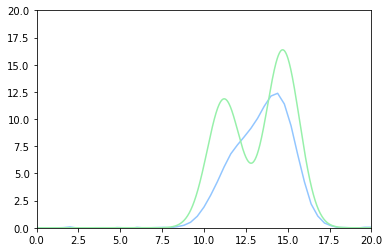

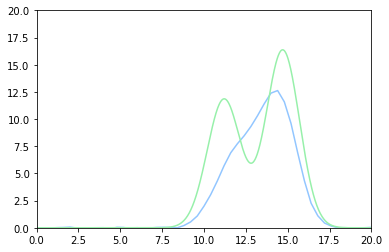

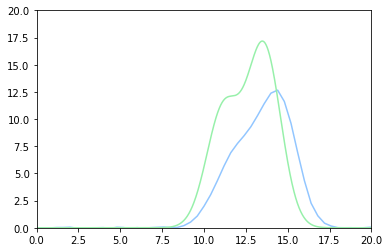

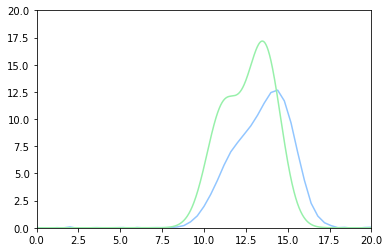

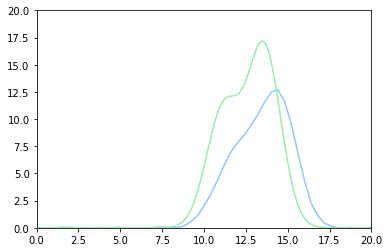

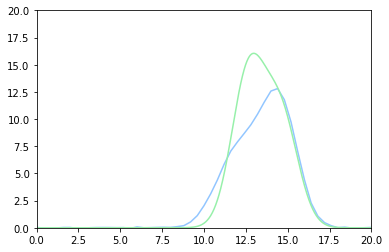

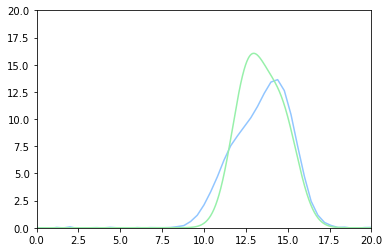

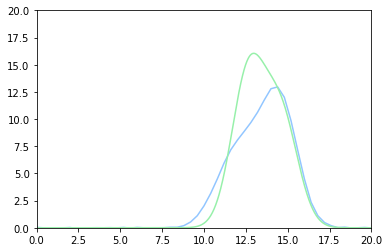

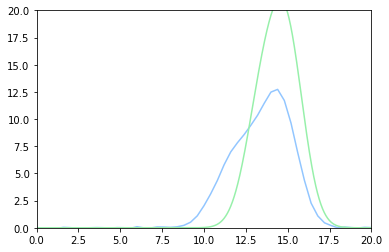

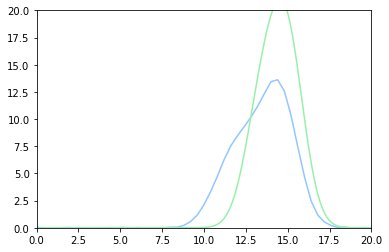

In [ ]:
class Learn(nn.Module):

  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(2 * (M + 1), M + 1)
    self.lin2 = nn.Linear( M + 1,  M + 1)
    self.lin3 = nn.Linear( M + 1, M + 1)
    self.lin4 = nn.Linear( M + 1, M + 1)
    self.lin5 = nn.Linear( M + 1, M + 1)
    self.lin6 = nn.Linear( M + 1, N_sp + 1)
  def forward(self, x):

    x = F.relu(self.lin1(x))
    x = F.relu(self.lin2(x))
    x = F.relu(self.lin3(x))
    x = F.relu(self.lin4(x))
    x = F.relu(self.lin5(x))
    x = self.lin6(x)
    return x
model = Learn()
model.load_state_dict(torch.load(filepath, map_location=torch.device('cpu')), strict=False)
for i in range(100,110):
    plt.plot(x_mesh[::sparsity_coeff], model(torch.from_numpy(x[0:sum(k) - 1]).float()[i,]).detach().numpy())
    plt.plot(x_mesh,torch.from_numpy(y[0:sum(k) - 1]).float()[i])
    plt.axis([0, 20, 0, 20])
    plt.show()


plt.show()

(0.0, 20.0)

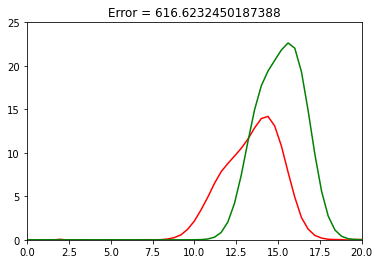

In [ ]:
f1_test = torch.from_numpy(test).float()
q_res = model(f1_test).detach().numpy()
q_simulated = (q_res[0] + q_res[1] + q_res[2])/3
q_model = np.zeros(N_sp + 1)
x_sp_mesh = x_mesh[::sparsity_coeff]
plt.plot(x_sp_mesh, q_simulated, 'r')
h_sp = x_sp_mesh[1] - x_sp_mesh[0]
q_model = 15 * np.exp(-(x_sp_mesh-14)**2/2) + 20 * np.exp(-(x_sp_mesh-16)**2/2)
error = np.abs(np.sum((q_model - q_simulated)**2 * h_sp))
plt.plot(x_sp_mesh, q_model, 'g')
plt.title("Error = {}".format(error))
plt.ylim((0,25))
plt.xlim((0,20))

#Arc 2
$\{\vec{u(t)}, \vec{f(t)}\}$

In [ ]:
!pip install wandb -qU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import time
from tqdm.notebook import tqdm
import torch.optim as optim
import wandb

wandb.login()
plt.style.use('seaborn-pastel')



gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
print(torch.backends.cudnn.deterministic == True)
print(torch.backends.cudnn.benchmark == False)

T = 20
t_0 = 0
M = 1000
N = 1000
epsilon = 10**(-2)
tau = (T - t_0)/M
t = np.arange(t_0, T, tau)
t = np.append(t, T)
a = 0
b = 20
h = (b - a)/N
x_mesh = np.arange(a, b, h)
x_mesh = np.append(x_mesh, b)

k = [22000]
q = np.zeros((sum(k), N + 1))
d = 0
for j in range(len(k)):
    file_q = open('/content/drive/My Drive/Biophys/q_exp_less_alpha.txt','r')
    for i in range(k[j]):
        s = 0
        line = file_q.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                # print(num)
                q[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_q.close()
y = q
print('q readed')
f1 = np.zeros((3*sum(k), M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/f_modulated.txt','r')
    for i in range(3*k[j]):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                f1[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
print('f_ID readed')
x1 = f1

u_interp = np.zeros((3*sum(k), M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/u_interp_model2.txt','r')
    for i in range(3*k[j]):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_interp[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
x2 = u_interp
print('u_interp readed')
d = 0
f_test = np.zeros((3, N + 1))
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/f_test2.txt','r')
    for i in range(3):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                f_test[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
u_test = np.zeros((3, N + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/u_interp_model_test2.txt','r')
    for i in range(3):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_test[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()


x = np.zeros((sum(k), 6 * (M + 1)))
y = q
test = np.zeros((1, 6 * (M + 1)))
for i in range(sum(k)):
  x[i, 0:M + 1] = x1[3 * i]
  x[i, M + 1:2 * (M + 1)] = x2[3 * i]
  x[i, 2 * (M + 1):3 * (M + 1)] = x1[3 * i + 1]
  x[i, 3 * (M + 1):4 * (M + 1)] = x2[3 * i + 1]
  x[i, 4 * (M + 1):5 * (M + 1)] = x1[3 * i + 2]
  x[i, 5 * (M + 1):6 * (M + 1)] = x2[3 * i + 2]

test[0, 0:M + 1] = f_test[0]
test[0, M + 1:2 * (M + 1)] = u_test[0]
test[0, 2 * (M + 1):3 * (M + 1)] = f_test[1]
test[0, 3 * (M + 1):4 * (M + 1)] = u_test[1]
test[0, 4 * (M + 1):5 * (M + 1)] = f_test[2]
test[0, 5 * (M + 1):6 * (M + 1)] = u_test[2]


In [ ]:
wandb.finish()
FLAGS = {}
filepath = r"/content/drive/My Drive/Biophys/model_Bio.txt"
filepath2 = r"/content/drive/My Drive/Biophys/model_Bio_2.txt"
filepath3 = r"/content/drive/My Drive/Biophys/model_Bio_3.txt"
FLAGS['batch_size'] = 1000
FLAGS['learning_rate'] = 0.000001
FLAGS['momentum'] = 0.5
FLAGS['num_epochs'] = 2000
FLAGS['log_steps'] = 30
FLAGS['metrics_debug'] = False
sparsity_coeff = 20
N_sp = int(N/sparsity_coeff)
wandb.init(
      # Set the project where this run will be logged
      project="Bio",
      entity="goraled",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"2 Default",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": FLAGS['learning_rate'],
      "architecture": "Second type",
      "dataset": "K = 20.000",
      "epochs": FLAGS['num_epochs'],
      "batch_size": FLAGS['batch_size']
      })

In [ ]:
torch.set_default_dtype(torch.float32)
class Learn(nn.Module):

  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(6 * (M + 1), M + 1)
    self.lin2 = nn.Linear( M + 1, M + 1)
    self.lin3 = nn.Linear( M + 1, M + 1)
    self.lin4 = nn.Linear( M + 1, M + 1)
    self.lin5 = nn.Linear( M + 1, M + 1)
    self.lin6 = nn.Linear( M + 1, N_sp + 1)

    # Define proportion or neurons to dropout
    self.dropout = nn.Dropout(0.25)
  def forward(self, x):

    x = F.relu(self.lin1(x))
    x = self.dropout(x)
    x = F.relu(self.lin2(x))
    x = self.dropout(x)
    x = F.relu(self.lin3(x))
    x = self.dropout(x)
    x = F.relu(self.lin4(x))
    x = self.dropout(x)
    x = F.relu(self.lin5(x))
    x = self.dropout(x)
    x = self.lin6(x)

    return x
torch.manual_seed(42)


X_train = torch.from_numpy(x[0:20000]).float()
X_test = torch.from_numpy(x[20000:22000]).float()
Y_train = torch.from_numpy(y[0:20000, ::sparsity_coeff]).float()
Y_test = torch.from_numpy(y[20000:22000, ::sparsity_coeff]).float()
print(Y_train.size())
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=FLAGS['batch_size'],
    drop_last=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle=False,
    drop_last=True)


lr = FLAGS['learning_rate']
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)



model = Learn()
# model.load_state_dict(torch.load(filepath3), strict=False)
model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()


def train_model(model, optimizer, data_loader, loss_module, data_val_loader, num_epochs=4000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        val_total_samples = 0
        val_loss = 0
        data_loss = 0
        data_total_samples = 0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            data_loss += loss
            data_total_samples += data_inputs.size()[0]
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()


        model.eval()
        for val_data, val_target in data_val_loader:

            val_data = val_data.to(device)
            val_target = val_target.to(device)

            val_preds = model(val_data)
            val_loss += loss_fn(val_preds, val_target)
            val_total_samples += val_data.size()[0]


        wandb.log({"loss": loss,
                   "val_loss": val_loss})


        model.train()
        # wandb.watch(model)
        if epoch % 10 == 0:
            torch.save(model.state_dict(), filepath3)





train_model(model, optimizer, train_loader, loss_fn, test_loader, FLAGS['num_epochs'])
wandb.finish()


In [ ]:
class Learn(nn.Module):

  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(6 * (M + 1), M + 1)
    self.lin2 = nn.Linear( M + 1,  M + 1)
    self.lin3 = nn.Linear( M + 1, M + 1)
    self.lin4 = nn.Linear( M + 1, M + 1)
    self.lin5 = nn.Linear( M + 1, M + 1)
    self.lin6 = nn.Linear( M + 1, N_sp + 1)
  def forward(self, x):

    x = F.relu(self.lin1(x))
    x = F.relu(self.lin2(x))
    x = F.relu(self.lin3(x))
    x = F.relu(self.lin4(x))
    x = F.relu(self.lin5(x))
    x = self.lin6(x)
    return x
model = Learn()
model.load_state_dict(torch.load(filepath3, map_location=torch.device('cpu')), strict=False)
for i in range(100,110):
    plt.plot(x_mesh[::sparsity_coeff], model(torch.from_numpy(x[0:sum(k) - 1]).float()[i,]).detach().numpy())
    plt.plot(x_mesh,torch.from_numpy(y[0:sum(k) - 1]).float()[i])
    plt.axis([0, 20, 0, 20])
    plt.show()


plt.show()

In [ ]:
f1_test = torch.from_numpy(test).float()
q_simulated = model(f1_test).detach().numpy()
q_model = np.zeros(N_sp + 1)
x_sp_mesh = x_mesh[::sparsity_coeff]
plt.plot(x_sp_mesh, q_simulated[0], 'r')
h_sp = x_sp_mesh[1] - x_sp_mesh[0]
q_model = 15 * np.exp(-(x_sp_mesh-14)**2/2) + 20 * np.exp(-(x_sp_mesh-16)**2/2)
error = np.abs(np.sum((q_model - q_simulated)**2 * h_sp))
plt.plot(x_sp_mesh, q_model, 'g')
plt.title("Error = {}".format(error))
plt.ylim((0,25))
plt.xlim((0,20))

#Arc 3
$\{u_i(t), f - \text{fixed}\}$

In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 5.1 MB/s 
     |████████████████████████████████| 182 kB 71.4 MB/s 
     |████████████████████████████████| 166 kB 64.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 166 kB 72.1 MB/s 
     |████████████████████████████████| 162 kB 63.2 MB/s 
     |████████████████████████████████| 162 kB 59.8 MB/s 
     |████████████████████████████████| 158 kB 64.3 MB/s 
     |████████████████████████████████| 157 kB 71.7 MB/s 
     |████████████████████████████████| 157 kB 73.0 MB/s 
     |████████████████████████████████| 157 kB 67.6 MB/s 
     |████████████████████████████████| 157 kB 66.7 MB/s 
     |████████████████████████████████| 157 kB 67.4 MB/s 
     |████████████████████████████████| 157 kB 71.8 MB/s 
     |████████████████████████████████| 157 kB 72.9 MB/s 
     |████████████████████████████████| 156 kB 68.9 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import time
from tqdm.notebook import tqdm
import torch.optim as optim
import wandb

wandb.login()
plt.style.use('seaborn-pastel')



gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
print(torch.backends.cudnn.deterministic == True)
print(torch.backends.cudnn.benchmark == False)

T = 20
t_0 = 0
M = 1000
N = 1000
epsilon = 10**(-2)
tau = (T - t_0)/M
t = np.arange(t_0, T, tau)
t = np.append(t, T)
a = 0
b = 20
h = (b - a)/N
x_mesh = np.arange(a, b, h)
x_mesh = np.append(x_mesh, b)

k = [1000]
q = np.zeros((sum(k), N + 1))
d = 0
for j in range(len(k)):
    file_q = open('/content/drive/My Drive/Biophys/q_exp_less_alpha_more_disp.txt','r')
    for i in range(k[j]):
        s = 0
        line = file_q.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                # print(num)
                q[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_q.close()
y = np.zeros((3*sum(k), M + 1))
y[:sum(k), :] = q
y[sum(k):2 * sum(k), :] = q
y[2 * sum(k):3 * sum(k), :] = q
print('q readed')

u_interp = np.zeros((3*sum(k), M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/u_interp_model_real_f.txt','r')
    for i in range(3*k[j]):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_interp[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
x = u_interp
print('u_interp readed')


u_test = np.zeros((3, N + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/u_real.txt','r')
    for i in range(3):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_test[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()


Mounted at /content/drive


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Is the GPU available? True
True
True
q readed
u_interp readed


In [ ]:
wandb.finish()
FLAGS = {}
filepath = r"/content/drive/My Drive/Biophys/model_Bio.txt"
filepath2 = r"/content/drive/My Drive/Biophys/model_Bio_2.txt"
filepath3 = r"/content/drive/My Drive/Biophys/model_Bio_3.txt"
FLAGS['batch_size'] = 1000
FLAGS['learning_rate'] = 0.0000001
FLAGS['momentum'] = 0.5
FLAGS['num_epochs'] = 10000
FLAGS['log_steps'] = 30
FLAGS['metrics_debug'] = False
sparsity_coeff = 20
N_sp = int(N/sparsity_coeff)
wandb.init(
      # Set the project where this run will be logged
      project="Bio",
      entity="goraled",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"3 Default Real Data",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": FLAGS['learning_rate'],
      "architecture": "Third type",
      "dataset": "K = 60.000",
      "epochs": FLAGS['num_epochs'],
      "batch_size": FLAGS['batch_size']
      })

wandb: Currently logged in as: goraled. Use `wandb login --relogin` to force relogin


In [ ]:
torch.set_default_dtype(torch.float64)
class Learn(nn.Module):

  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear((M + 1), M + 1)
    self.lin2 = nn.Linear( M + 1, M + 1)
    self.lin3 = nn.Linear( M + 1, M + 1)
    self.lin4 = nn.Linear( M + 1, M + 1)
    self.lin5 = nn.Linear( M + 1, M + 1)
    self.lin6 = nn.Linear( M + 1, N_sp + 1)

    # Define proportion or neurons to dropout
    self.dropout = nn.Dropout(0.25)
  def forward(self, x):

    x = F.relu(self.lin1(x))
    x = self.dropout(x)
    x = F.relu(self.lin2(x))
    x = self.dropout(x)
    x = F.relu(self.lin3(x))
    x = self.dropout(x)
    x = F.relu(self.lin4(x))
    x = self.dropout(x)
    x = F.relu(self.lin5(x))
    x = self.dropout(x)
    x = self.lin6(x)

    return x
torch.manual_seed(42)


X_train = torch.from_numpy(x[0:2000])
X_test = torch.from_numpy(x[2000:3000])
Y_train = torch.from_numpy(y[0:2000, ::sparsity_coeff])
Y_test = torch.from_numpy(y[2000:3000, ::sparsity_coeff])
print(Y_train.size())
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=FLAGS['batch_size'],
    drop_last=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle=False,
    drop_last=True)


lr = FLAGS['learning_rate']
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)



model = Learn()
# model.load_state_dict(torch.load(filepath3), strict=False)
model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()


def train_model(model, optimizer, data_loader, loss_module, data_val_loader, num_epochs=4000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        val_total_samples = 0
        val_loss = 0
        data_loss = 0
        data_total_samples = 0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            data_loss += loss
            data_total_samples += data_inputs.size()[0]
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            print(type(loss))
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()


        model.eval()
        for val_data, val_target in data_val_loader:

            val_data = val_data.to(device)
            val_target = val_target.to(device)

            val_preds = model(val_data)
            val_loss += loss_fn(val_preds, val_target)
            val_total_samples += val_data.size()[0]


        wandb.log({"loss": loss,
                   "val_loss": val_loss})


        model.train()
        # wandb.watch(model)
        if epoch % 10 == 0:
            torch.save(model.state_dict(), filepath3)





train_model(model, optimizer, train_loader, loss_fn, test_loader, FLAGS['num_epochs'])
wandb.finish()


torch.Size([2000, 51])
Device cuda


  0%|          | 0/10000 [00:00<?, ?it/s]

<class 'torch.Tensor'>


RuntimeError: ignored

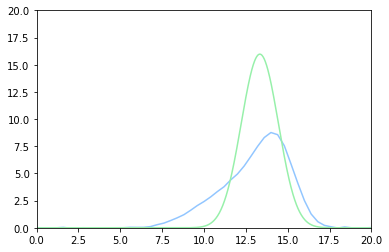

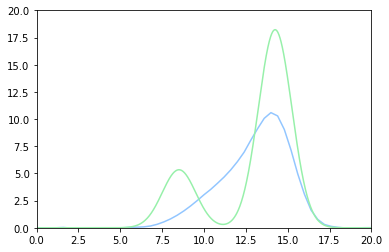

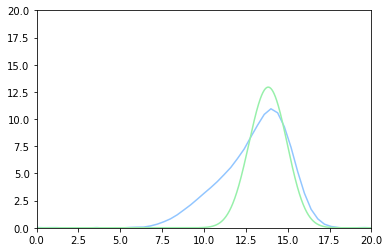

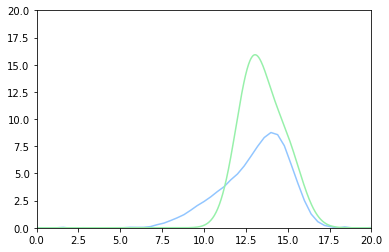

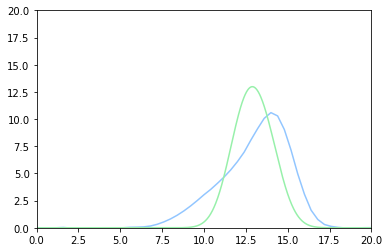

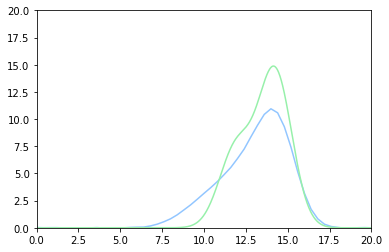

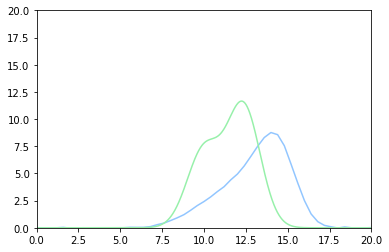

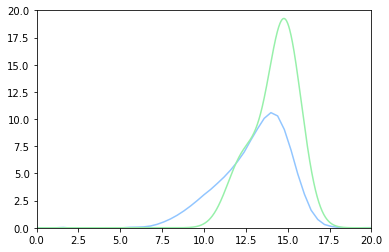

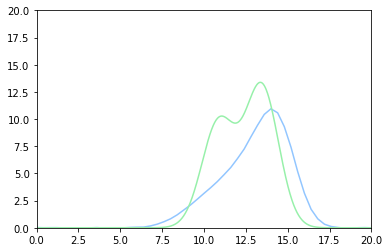

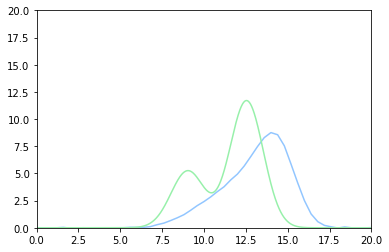

In [ ]:
class Learn(nn.Module):

  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear((M + 1), M + 1)
    self.lin2 = nn.Linear( M + 1,  M + 1)
    self.lin3 = nn.Linear( M + 1, M + 1)
    self.lin4 = nn.Linear( M + 1, M + 1)
    self.lin5 = nn.Linear( M + 1, M + 1)
    self.lin6 = nn.Linear( M + 1, N_sp + 1)
  def forward(self, x):

    x = F.relu(self.lin1(x))
    x = F.relu(self.lin2(x))
    x = F.relu(self.lin3(x))
    x = F.relu(self.lin4(x))
    x = F.relu(self.lin5(x))
    x = self.lin6(x)
    return x
model = Learn()
model.load_state_dict(torch.load(filepath3, map_location=torch.device('cpu')), strict=False)
for i in range(100,110):
    plt.plot(x_mesh[::sparsity_coeff], model(torch.from_numpy(x[0:sum(k) - 1]).float()[i,]).detach().numpy())
    plt.plot(x_mesh,torch.from_numpy(y[0:sum(k) - 1]).float()[i])
    plt.axis([0, 20, 0, 20])
    plt.show()


plt.show()

(0.0, 20.0)

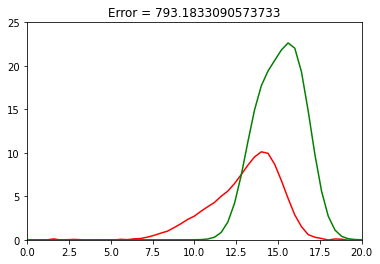

In [ ]:
test = torch.from_numpy(u_test).float()
q_res = model(test).detach().numpy()
q_simulated = (q_res[0] + q_res[1] + q_res[2])/3
q_model = np.zeros(N_sp + 1)
x_sp_mesh = x_mesh[::sparsity_coeff]
plt.plot(x_sp_mesh, q_simulated, 'r')
h_sp = x_sp_mesh[1] - x_sp_mesh[0]
q_model = 15 * np.exp(-(x_sp_mesh-14)**2/2) + 20 * np.exp(-(x_sp_mesh-16)**2/2)
error = np.abs(np.sum((q_model - q_simulated)**2 * h_sp))
plt.plot(x_sp_mesh, q_model, 'g')
plt.title("Error = {}".format(error))
plt.ylim((0,25))
plt.xlim((0,20))

#Arc 4
$\{\vec{u(t)}, f - \text{fixed}\}$

In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 5.0 MB/s 
     |████████████████████████████████| 168 kB 63.9 MB/s 
     |████████████████████████████████| 182 kB 70.8 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 168 kB 63.6 MB/s 
     |████████████████████████████████| 166 kB 69.1 MB/s 
     |████████████████████████████████| 166 kB 83.6 MB/s 
     |████████████████████████████████| 162 kB 53.8 MB/s 
     |████████████████████████████████| 162 kB 80.2 MB/s 
     |████████████████████████████████| 158 kB 67.9 MB/s 
     |████████████████████████████████| 157 kB 72.2 MB/s 
     |████████████████████████████████| 157 kB 77.2 MB/s 
     |████████████████████████████████| 157 kB 57.2 MB/s 
     |████████████████████████████████| 157 kB 67.7 MB/s 
     |████████████████████████████████| 157 kB 48.8 MB/s 
     |████████████████████████████████| 157 kB 81.3 MB/s 
     |████████████████████████████████| 157 kB 73.9 MB/s 
     |███████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import time
from tqdm.notebook import tqdm
import torch.optim as optim
import wandb

wandb.login()
plt.style.use('seaborn-pastel')



gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
print(torch.backends.cudnn.deterministic == True)
print(torch.backends.cudnn.benchmark == False)

T = 20
t_0 = 0
M = 1000
N = 1000
epsilon = 10**(-2)
tau = (T - t_0)/M
t = np.arange(t_0, T, tau)
t = np.append(t, T)
a = 0
b = 20
h = (b - a)/N
x_mesh = np.arange(a, b, h)
x_mesh = np.append(x_mesh, b)

k = [22000]
q = np.zeros((sum(k), N + 1))
d = 0
for j in range(len(k)):
    file_q = open('/content/drive/My Drive/Biophys/q_pol.txt','r')
    for i in range(k[j]):
        s = 0
        line = file_q.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                # print(num)
                q[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_q.close()
y = q
print('q readed')

u_interp = np.zeros((3*sum(k), M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/Tu_pol_interp_22k.txt','r')
    for i in range(3*k[j]):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_interp[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
x1 = u_interp
print('u_interp readed')


u_test = np.zeros((3, M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/Tu_test_real_f1.txt','r')
    for i in range(3):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_test[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()

x = np.zeros((sum(k), 3 * (M + 1)))
y = q
test = np.zeros((1, 3 * (M + 1)))
for i in range(sum(k)):
  x[i, 0:M + 1] = x1[3 * i]
  x[i, M + 1:2 * (M + 1)] = x1[3 * i + 1]
  x[i, 2 * (M + 1):3 * (M + 1)] = x1[3 * i + 2]

test[0, 0:M + 1] = u_test[0, :]
test[0, M + 1:2 * (M + 1)] = u_test[1, :]
test[0, 2 * (M + 1):3 * (M + 1)] = u_test[2, :]

Mounted at /content/drive


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Is the GPU available? True
True
True
q readed
u_interp readed


In [ ]:
#Data Normalize
x_1_1 = np.zeros((sum(k), (M + 1)))
x_1_2 = np.zeros((sum(k), (M + 1)))
x_1_3 = np.zeros((sum(k), (M + 1)))
x_1_1_new = np.zeros((sum(k), (M + 1)))
for i in range(sum(k)):
  x_1_1[i, :] = x1[3 * i]
  x_1_2[i, :] = x1[3 * i + 1]
  x_1_3[i, :] = x1[3 * i + 2]
x_1_1_new = (x_1_1)/(x_1_1.max(axis=0))
x_1_2_new = (x_1_2)/(x_1_2.max(axis=0))
x_1_3_new = (x_1_3)/(x_1_3.max(axis=0))
test[0, 0:M + 1] = u_test[0, :]/(x_1_1.max(axis=0))
test[0, M + 1:2 * (M + 1)] = u_test[1, :]/(x_1_2.max(axis=0))
test[0, 2 * (M + 1):3 * (M + 1)] = u_test[2, :]/(x_1_3.max(axis=0))
for i in range(sum(k)):
  x[i, 0:M + 1] = x_1_1_new[i, :]
  x[i, M + 1:2 * (M + 1)] = x_1_2_new[i, :]
  x[i, 2 * (M + 1):3 * (M + 1)] = x_1_3_new[i, :]
x = np.nan_to_num(x)
test = np.nan_to_num(test)

<ipython-input-3-16514223294d>:10: RuntimeWarning: invalid value encountered in true_divide
  x_1_1_new = (x_1_1)/(x_1_1.max(axis=0))
<ipython-input-3-16514223294d>:11: RuntimeWarning: invalid value encountered in true_divide
  x_1_2_new = (x_1_2)/(x_1_2.max(axis=0))
<ipython-input-3-16514223294d>:12: RuntimeWarning: invalid value encountered in true_divide
  x_1_3_new = (x_1_3)/(x_1_3.max(axis=0))
<ipython-input-3-16514223294d>:13: RuntimeWarning: divide by zero encountered in true_divide
  test[0, 0:M + 1] = u_test[0, :]/(x_1_1.max(axis=0))
<ipython-input-3-16514223294d>:14: RuntimeWarning: divide by zero encountered in true_divide
  test[0, M + 1:2 * (M + 1)] = u_test[1, :]/(x_1_2.max(axis=0))
<ipython-input-3-16514223294d>:14: RuntimeWarning: invalid value encountered in true_divide
  test[0, M + 1:2 * (M + 1)] = u_test[1, :]/(x_1_2.max(axis=0))
<ipython-input-3-16514223294d>:15: RuntimeWarning: divide by zero encountered in true_divide
  test[0, 2 * (M + 1):3 * (M + 1)] = u_test[2

In [ ]:
wandb.finish()
FLAGS = {}
filepath = r"/content/drive/My Drive/Biophys/model_Bio_4_more_neu.txt"
filepath2 = r"/content/drive/My Drive/Biophys/model_Bio_4_3innerlay.txt"
filepath3 = r"/content/drive/My Drive/Biophys/model_Bio_4.txt"
filepath4 = r"/content/drive/My Drive/Biophys/model_Bio_4_2.txt"
filepath5 = r"/content/drive/My Drive/Biophys/model_Bio_4_x10lr.txt"
filepath6 = r"/content/drive/My Drive/Biophys/model_Bio_4_3innerlay.txt"

FLAGS['batch_size'] = 1000
FLAGS['learning_rate'] = 0.00001
FLAGS['momentum'] = 0.5
FLAGS['num_epochs'] = 2000
FLAGS['log_steps'] = 30
FLAGS['metrics_debug'] = False
sparsity_coeff = 20
N_sp = int(N/sparsity_coeff)
wandb.init(
      # Set the project where this run will be logged
      project="Bio",
      entity="goraled",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"4 Data norm lr/10",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": FLAGS['learning_rate'],
      "architecture": "Better res",
      "dataset": "K = 20.000",
      "epochs": FLAGS['num_epochs'],
      "batch_size": FLAGS['batch_size']
      })

wandb: Currently logged in as: goraled. Use `wandb login --relogin` to force relogin


In [ ]:
torch.set_default_dtype(torch.float64)
class Learn(nn.Module):

  def __init__(self):
    incr_data = 1
    super().__init__()
    self.lin1 = nn.Linear( 3 * (M + 1), incr_data * (M + 1))
    self.lin2 = nn.Linear( incr_data * (M + 1),  incr_data * (M + 1))
    self.lin3 = nn.Linear( incr_data * (M + 1), incr_data * (M + 1))
    self.lin4 = nn.Linear( incr_data * (M + 1), incr_data * (M + 1))
    # self.lin5 = nn.Linear( incr_data * (M + 1), incr_data * (M + 1))
    self.lin6 = nn.Linear( incr_data * (M + 1), N_sp + 1)

    # Define proportion or neurons to dropout
    self.dropout = nn.Dropout(0.25)
  def forward(self, x):

    x = F.relu(self.lin1(x))
    x = self.dropout(x)
    x = torch.sigmoid(self.lin2(x))
    x = self.dropout(x)
    x = torch.sigmoid(self.lin3(x))
    x = self.dropout(x)
    x = F.relu(self.lin4(x))
    x = self.dropout(x)
    x = F.relu(self.lin6(x))

    return x
torch.manual_seed(42)


X_train = torch.from_numpy(x[0:20000])
X_test = torch.from_numpy(x[20000:22000])
Y_train = torch.from_numpy(y[0:20000, ::sparsity_coeff])
Y_test = torch.from_numpy(y[20000:22000, ::sparsity_coeff])
print(Y_train.size())
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=FLAGS['batch_size'],
    drop_last=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle=False,
    drop_last=True)


lr = FLAGS['learning_rate']
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)



model = Learn()
model.double()
model.load_state_dict(torch.load(filepath6), strict=False)
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()


def train_model(model, optimizer, data_loader, loss_module, data_val_loader, num_epochs=4000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        model_func_loss = 0
        val_total_samples = 0
        val_loss = 0
        data_loss = 0
        data_total_samples = 0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels)
            data_loss += loss
            data_total_samples += data_inputs.size()[0]
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()


        model.eval()
        for val_data, val_target in data_val_loader:

            val_data = val_data.to(device)
            val_target = val_target.to(device)

            val_preds = model(val_data)
            val_loss += loss_fn(val_preds, val_target)
            val_total_samples += val_data.size()[0]

        wandb.log({"loss": loss,
                   "val_loss": val_loss})


        model.train()
        # wandb.watch(model)
        if epoch % 100 == 0:
            torch.save(model.state_dict(), filepath6)





train_model(model, optimizer, train_loader, loss_fn, test_loader, FLAGS['num_epochs'])
wandb.finish()


torch.Size([20000, 51])
Device cuda


  0%|          | 0/2000 [00:00<?, ?it/s]

loss,█▅▅▆▄▄▄▄▃▃▃▃▃▄▃▃▃▃▃▃▄▃▃▃▄▃▃▁▁▁▃▁▂▁▂▁▂▂▁▁
val_loss,▇▄▄▄▄▄▄▃▃▄▃▃▃▃▃▃▃▃▃▃▃▃█▂▃▃▃▁▁▁▂▁▂▁▂▁▁▁▁▁
loss,6.27734
val_loss,11.67279


In [ ]:
class Learn(nn.Module):

  def __init__(self):
    incr_data = 1
    super().__init__()
    self.lin1 = nn.Linear( 3 * (M + 1), incr_data * (M + 1))
    self.lin2 = nn.Linear( incr_data * (M + 1),  incr_data * (M + 1))
    # self.lin2_bn = nn.BatchNorm1d( incr_data * (M + 1) )
    self.lin3 = nn.Linear( incr_data * (M + 1), incr_data * (M + 1))
    # self.lin3_bn = nn.BatchNorm1d( incr_data * (M + 1) )
    self.lin4 = nn.Linear( incr_data * (M + 1), incr_data * (M + 1))
    self.lin6 = nn.Linear( incr_data * (M + 1), N_sp + 1)

    # Define proportion or neurons to dropout
    self.dropout = nn.Dropout(0.25)
  def forward(self, x):

    x = F.relu(self.lin1(x))
    x = torch.sigmoid(self.lin2(x))
    x = torch.sigmoid(self.lin3(x))
    x = F.relu(self.lin4(x))
    x = F.relu(self.lin6(x))

    return x
model = Learn()
model.double()
model.load_state_dict(torch.load(filepath6, map_location=torch.device('cpu')), strict=False)
# for i in range(100,110):
#     plt.plot(x_mesh[::sparsity_coeff], model(torch.from_numpy(x[0:sum(k) - 1]))[i].detach().numpy())
#     plt.plot(x_mesh,torch.from_numpy(y[0:sum(k) - 1])[i])
#     plt.axis([0, 20, 0, 20])
#     plt.show()


# plt.show()

<All keys matched successfully>

(0.0, 20.0)

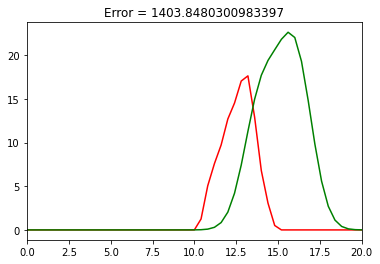

In [ ]:
f1_test = torch.from_numpy(test)
q_simulated = model(f1_test).detach().numpy()
q_model = np.zeros(N_sp + 1)
x_sp_mesh = x_mesh[::sparsity_coeff]
plt.plot(x_sp_mesh, q_simulated[0], 'r')
h_sp = x_sp_mesh[1] - x_sp_mesh[0]
q_model = 15 * np.exp(-(x_sp_mesh-14)**2/2) + 20 * np.exp(-(x_sp_mesh-16)**2/2)
error = np.abs(np.sum((q_model - q_simulated)**2 * h_sp))
plt.plot(x_sp_mesh, q_model, 'g')
plt.title("Error = {}".format(error))
# plt.ylim((0,25))
plt.xlim((0,20))

In [ ]:
print(x_1_2_new)

[[            nan  1.06497445e-55  6.41879877e-65 ...  9.96541628e-01
   9.96546145e-01  9.96551706e-01]
 [            nan -3.46612956e-33 -2.28737276e-41 ...  9.96541628e-01
   9.96546145e-01  9.96551706e-01]
 [            nan -1.26301754e-21  1.04134858e-30 ...  9.96541629e-01
   9.96546147e-01  9.96551712e-01]
 ...
 [            nan  5.07373643e-48 -8.50955216e-57 ...  9.96541628e-01
   9.96546145e-01  9.96551706e-01]
 [            nan -5.59265722e-24 -7.30742576e-34 ...  9.96541628e-01
   9.96546145e-01  9.96551706e-01]
 [            nan -3.18965560e-16  2.40355929e-24 ...  9.96720394e-01
   9.96962599e-01  9.97335601e-01]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [ ]:
for i in range(N):
  if x[0,i] != x[1,i]:
    print("numpy: ",x[0,i],"      ", x[1,i] )
    print("torch: ", X_train[0,i],"      ", X_train[1,i])

#Arc 5
$\{(x,t), u(x,t)\}$

In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 6.9 MB/s 
     |████████████████████████████████| 182 kB 66.6 MB/s 
     |████████████████████████████████| 162 kB 68.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 162 kB 70.8 MB/s 
     |████████████████████████████████| 158 kB 73.9 MB/s 
     |████████████████████████████████| 157 kB 77.0 MB/s 
     |████████████████████████████████| 157 kB 66.6 MB/s 
     |████████████████████████████████| 157 kB 72.1 MB/s 
     |████████████████████████████████| 157 kB 53.6 MB/s 
     |████████████████████████████████| 157 kB 73.6 MB/s 
     |████████████████████████████████| 157 kB 58.0 MB/s 
     |████████████████████████████████| 157 kB 48.8 MB/s 
     |████████████████████████████████| 156 kB 46.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import time
from tqdm.notebook import tqdm
import torch.optim as optim
import wandb

wandb.login()
plt.style.use('seaborn-pastel')



gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
print(torch.backends.cudnn.deterministic == True)
print(torch.backends.cudnn.benchmark == False)

T = 20
t_0 = 0
M = 1000
N = 1000
epsilon = 10**(-2)
tau = (T - t_0)/M
t = np.arange(t_0, T, tau)
t = np.append(t, T)
a = 0
b = 20
h = (b - a)/N
x_mesh = np.arange(a, b, h)
x_mesh = np.append(x_mesh, b)

k = [10000]
q = np.zeros((sum(k), N + 1))
d = 0
for j in range(len(k)):
    file_q = open('/content/drive/My Drive/Biophys/q_exp_less_alpha.txt','r')
    for i in range(k[j]):
        s = 0
        line = file_q.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                # print(num)
                q[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_q.close()
y = q
print('q readed')
x_rand = np.zeros((sum(k), M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/x_rand.txt','r')
    for i in range(k[j]):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                x_rand[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
x1 = x_rand
print('x readed')
t_rand = np.zeros((sum(k), M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/t_rand.txt','r')
    for i in range(k[j]):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                t_rand[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
x2 = t_rand
print('t readed')
u_interp = np.zeros((sum(k), M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/u_interp_x,t.txt','r')
    for i in range(k[j]):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_interp[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
x3 = u_interp
print('u_interp readed')


u_test = np.zeros((3, N + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/u_interp_model_test2.txt','r')
    for i in range(3):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_test[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
d = 0
f_test = np.zeros((3, N + 1))
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/f_test2.txt','r')
    for i in range(3):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                f_test[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
x = np.zeros((sum(k), 3 * (M + 1)))
y = q
test = np.zeros((3, 3 * (M + 1)))
for i in range(sum(k)):
  x[i, 0:M + 1] = x1[i, :]
  x[i, M + 1:2 * (M + 1)] = x2[i, :]
  x[i, 2 * (M + 1):3 * (M + 1)] = x3[i, :]
for i in range(3):
  test[i, 0:M + 1] = f_test[i, :]
  test[i, M + 1:2 * (M + 1)] = t
  test[i, 2 * (M + 1):3 * (M + 1)] = u_test[i, :]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Is the GPU available? True
True
True
q readed
x readed
t readed
u_interp readed


In [ ]:
wandb.finish()
FLAGS = {}
filepath = r"/content/drive/My Drive/Biophys/model_Bio.txt"
filepath2 = r"/content/drive/My Drive/Biophys/model_Bio_2.txt"
filepath3 = r"/content/drive/My Drive/Biophys/model_Bio_3.txt"
filepath4 = r"/content/drive/My Drive/Biophys/model_Bio_4.txt"
filepath5 = r"/content/drive/My Drive/Biophys/model_Bio_5.txt"
FLAGS['batch_size'] = 1000
FLAGS['learning_rate'] = 0.0000001
FLAGS['momentum'] = 0.5
FLAGS['num_epochs'] = 5000
FLAGS['log_steps'] = 30
FLAGS['metrics_debug'] = False
sparsity_coeff = 20
N_sp = int(N/sparsity_coeff)
wandb.init(
      # Set the project where this run will be logged
      project="Bio",
      entity="goraled",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"5 Default",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": FLAGS['learning_rate'],
      "architecture": "Fourth type",
      "dataset": "K = 10.000",
      "epochs": FLAGS['num_epochs'],
      "batch_size": FLAGS['batch_size']
      })

loss,███▇▇▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,███▇▇▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,38.58711
val_loss,39.30804


In [ ]:
torch.set_default_dtype(torch.float32)
class Learn(nn.Module):

  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(3 * (M + 1), M + 1)
    self.lin2 = nn.Linear( M + 1, M + 1)
    self.lin3 = nn.Linear( M + 1, M + 1)
    self.lin4 = nn.Linear( M + 1, M + 1)
    self.lin5 = nn.Linear( M + 1, M + 1)
    self.lin6 = nn.Linear( M + 1, N_sp + 1)

    # Define proportion or neurons to dropout
    self.dropout = nn.Dropout(0.25)
  def forward(self, x):

    x = F.relu(self.lin1(x))
    x = self.dropout(x)
    x = F.relu(self.lin2(x))
    x = self.dropout(x)
    x = F.relu(self.lin3(x))
    x = self.dropout(x)
    x = F.relu(self.lin4(x))
    x = self.dropout(x)
    x = F.relu(self.lin5(x))
    x = self.dropout(x)
    x = self.lin6(x)

    return x
torch.manual_seed(42)


X_train = torch.from_numpy(x[0:9000]).float()
X_test = torch.from_numpy(x[9000:10000]).float()
Y_train = torch.from_numpy(y[0:9000, ::sparsity_coeff]).float()
Y_test = torch.from_numpy(y[9000:10000, ::sparsity_coeff]).float()
print(Y_train.size())
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=FLAGS['batch_size'],
    drop_last=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle=False,
    drop_last=True)


lr = FLAGS['learning_rate']
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)



model = Learn()
# model.load_state_dict(torch.load(filepath3), strict=False)
model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()


def train_model(model, optimizer, data_loader, loss_module, data_val_loader, num_epochs=4000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        val_total_samples = 0
        val_loss = 0
        data_loss = 0
        data_total_samples = 0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            data_loss += loss
            data_total_samples += data_inputs.size()[0]
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()


        model.eval()
        for val_data, val_target in data_val_loader:

            val_data = val_data.to(device)
            val_target = val_target.to(device)

            val_preds = model(val_data)
            val_loss += loss_fn(val_preds, val_target)
            val_total_samples += val_data.size()[0]


        wandb.log({"loss": loss,
                   "val_loss": val_loss})


        model.train()
        # wandb.watch(model)
        if epoch % 10 == 0:
            torch.save(model.state_dict(), filepath5)





train_model(model, optimizer, train_loader, loss_fn, test_loader, FLAGS['num_epochs'])
wandb.finish()


torch.Size([9000, 51])
Device cuda


  0%|          | 0/5000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

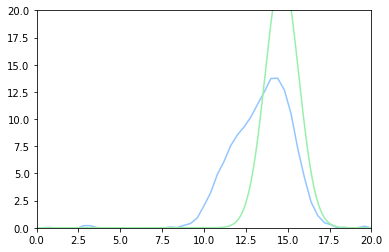

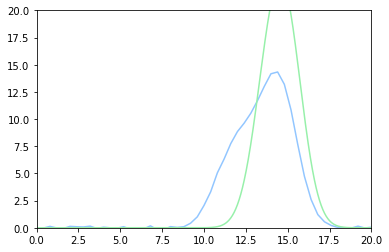

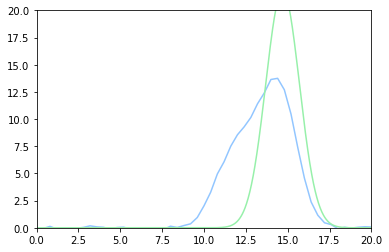

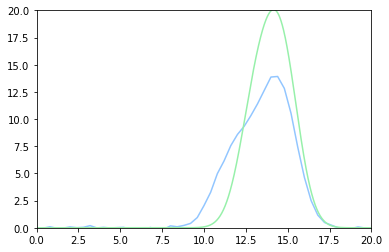

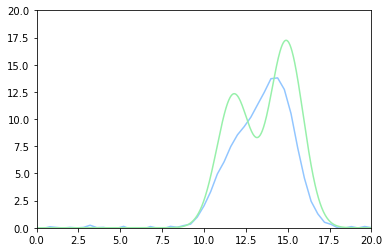

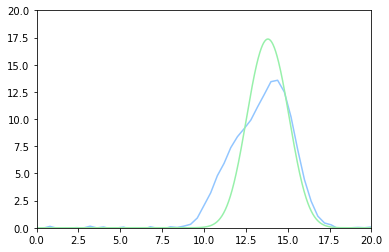

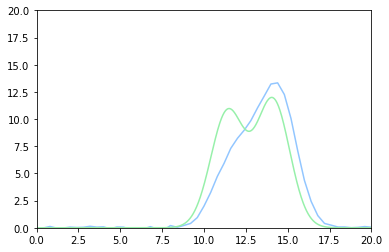

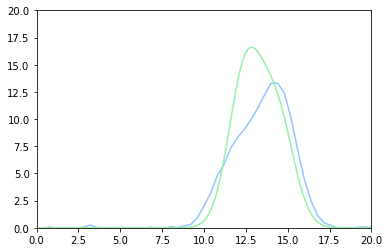

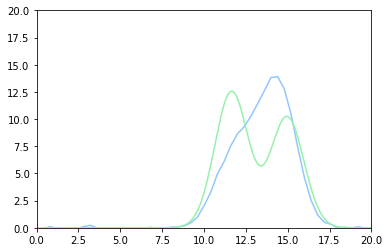

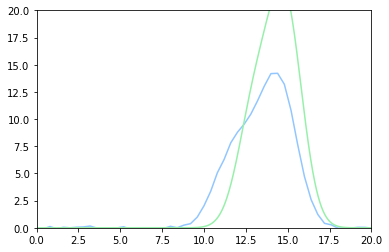

In [ ]:
class Learn(nn.Module):

  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(3 * (M + 1), M + 1)
    self.lin2 = nn.Linear( M + 1,  M + 1)
    self.lin3 = nn.Linear( M + 1, M + 1)
    self.lin4 = nn.Linear( M + 1, M + 1)
    self.lin5 = nn.Linear( M + 1, M + 1)
    self.lin6 = nn.Linear( M + 1, N_sp + 1)
  def forward(self, x):

    x = F.relu(self.lin1(x))
    x = F.relu(self.lin2(x))
    x = F.relu(self.lin3(x))
    x = F.relu(self.lin4(x))
    x = F.relu(self.lin5(x))
    x = self.lin6(x)
    return x
model = Learn()
model.load_state_dict(torch.load(filepath5, map_location=torch.device('cpu')), strict=False)
for i in range(100,110):
    plt.plot(x_mesh[::sparsity_coeff], model(torch.from_numpy(x[0:sum(k) - 1]).float()[i,]).detach().numpy())
    plt.plot(x_mesh,torch.from_numpy(y[0:sum(k) - 1]).float()[i])
    plt.axis([0, 20, 0, 20])
    plt.show()


plt.show()

(0.0, 20.0)

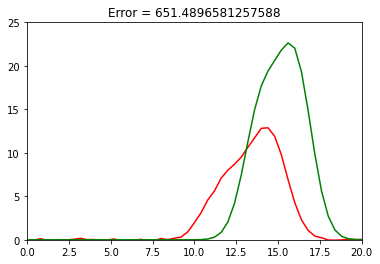

In [ ]:
f1_test = torch.from_numpy(test).float()
q_res = model(f1_test).detach().numpy()
q_simulated = (q_res[0] + q_res[1] + q_res[2])/3
q_model = np.zeros(N_sp + 1)
x_sp_mesh = x_mesh[::sparsity_coeff]
plt.plot(x_sp_mesh, q_simulated, 'r')
h_sp = x_sp_mesh[1] - x_sp_mesh[0]
q_model = 15 * np.exp(-(x_sp_mesh-14)**2/2) + 20 * np.exp(-(x_sp_mesh-16)**2/2)
error = np.abs(np.sum((q_model - q_simulated)**2 * h_sp))
plt.plot(x_sp_mesh, q_model, 'g')
plt.title("Error = {}".format(error))
plt.ylim((0,25))
plt.xlim((0,20))

In [ ]:
for i in range(3):
  test[i, 0:M + 1] = f_test[i, :]
  test[i, M + 1:2 * (M + 1)] = t
  test[i, 2 * (M + 1):3 * (M + 1)] = u_test[i, :]

# ConvNet


In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 6.3 MB/s 
     |████████████████████████████████| 168 kB 69.9 MB/s 
     |████████████████████████████████| 182 kB 33.2 MB/s 
     |████████████████████████████████| 62 kB 399 kB/s 
     |████████████████████████████████| 168 kB 64.3 MB/s 
     |████████████████████████████████| 166 kB 20.1 MB/s 
     |████████████████████████████████| 166 kB 8.9 MB/s 
     |████████████████████████████████| 162 kB 53.6 MB/s 
     |████████████████████████████████| 162 kB 55.9 MB/s 
     |████████████████████████████████| 158 kB 41.8 MB/s 
     |████████████████████████████████| 157 kB 24.8 MB/s 
     |████████████████████████████████| 157 kB 44.1 MB/s 
     |████████████████████████████████| 157 kB 13.9 MB/s 
     |████████████████████████████████| 157 kB 29.9 MB/s 
     |████████████████████████████████| 157 kB 29.9 MB/s 
     |████████████████████████████████| 157 kB 11.1 MB/s 
     |████████████████████████████████| 157 kB 64.8 MB/s 
     |████████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import time
from tqdm.notebook import tqdm
import torch.optim as optim
import wandb

wandb.login()
plt.style.use('seaborn-pastel')



gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
print(torch.backends.cudnn.deterministic == True)
print(torch.backends.cudnn.benchmark == False)

T = 20
t_0 = 0
M = 1000
N = 1000
epsilon = 10**(-2)
tau = (T - t_0)/M
t = np.arange(t_0, T, tau)
t = np.append(t, T)
a = 0
b = 20
h = (b - a)/N
x_mesh = np.arange(a, b, h)
x_mesh = np.append(x_mesh, b)

k = [22000]
q = np.zeros((sum(k), N + 1))
d = 0
for j in range(len(k)):
    file_q = open('/content/drive/My Drive/Biophys/q_pol.txt','r')
    for i in range(k[j]):
        s = 0
        line = file_q.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                # print(num)
                q[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_q.close()
y = q
print('q readed')

u_interp = np.zeros((3*sum(k), M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/Tu_pol_interp_22k.txt','r')
    for i in range(3*k[j]):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_interp[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()
x1 = u_interp
print('u_interp readed')


u_test = np.zeros((3, M + 1))
d = 0
for j in range(len(k)):
    file_f = open('/content/drive/My Drive/Biophys/Tu_test_real_f1.txt','r')
    for i in range(3):
        s = 0
        line = file_f.readline()
        for num in line.split("\t"):
            if s < M + 1 and num != '\n':
                u_test[i + d,s] = float(num)
            s = s + 1
    d = d + k[j]
    file_f.close()

x = np.zeros((sum(k), 3, (M + 1)))
y = q
test = np.zeros((1, 3, (M + 1)))
for i in range(sum(k)):
  for j in range(3):
    x[i, j, :] = x1[3 * i + j]
for j in range(3):
  test[0, j, :] = u_test[j, :]


Mounted at /content/drive


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Is the GPU available? True
True
True
q readed
u_interp readed


In [ ]:
del x1
del q
del u_interp

In [ ]:
wandb.finish()
FLAGS = {}
filepath = r"/content/drive/My Drive/Biophys/model_Bio_ConvNet_less_neu_10lr_500iter.txt"


FLAGS['batch_size'] = 1000
FLAGS['learning_rate'] = 0.001
FLAGS['momentum'] = 0.5
FLAGS['num_epochs'] = 500
FLAGS['log_steps'] = 30
FLAGS['metrics_debug'] = False
sparsity_coeff = 20
N_sp = int(N/sparsity_coeff)
wandb.init(
      # Set the project where this run will be logged
      project="Bio",
      entity="goraled",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"ConvNet less neu lr * 10 500 iter",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": FLAGS['learning_rate'],
      "architecture": "Default",
      "dataset": "K = 20.000",
      "epochs": FLAGS['num_epochs'],
      "batch_size": FLAGS['batch_size']
      })

In [ ]:
torch.set_default_dtype(torch.float64)
class Learn(nn.Module):
  def __init__(self):
    super(Learn, self).__init__()
    self.conv_stack = nn.Sequential(
        nn.Conv1d(3, 8, 5, padding=2),
        nn.MaxPool1d(2), # size (M + 1)//2
        nn.Sigmoid(),
        nn.Conv1d(8, 16, 5, padding=2),
        nn.MaxPool1d(2), # size (M + 1)//4
        nn.Sigmoid(),
        nn.Flatten(),
        nn.Linear(4000 , M + 1), # in = channel*heght*width
        nn.ReLU(),
        nn.Linear(M + 1, N_sp + 1),
        nn.ReLU()
    )

  def forward(self, x):
    x = self.conv_stack(x)
    return x
torch.manual_seed(42)


X_train = torch.from_numpy(x[0:20000])
X_test = torch.from_numpy(x[20000:22000])
Y_train = torch.from_numpy(y[0:20000, ::sparsity_coeff])
Y_test = torch.from_numpy(y[20000:22000, ::sparsity_coeff])
print(Y_train.size())
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=FLAGS['batch_size'],
    drop_last=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle=False,
    drop_last=True)


lr = FLAGS['learning_rate']
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)



model = Learn()
model.double()
# model.load_state_dict(torch.load(filepath), strict=False)
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()


def train_model(model, optimizer, data_loader, loss_module, data_val_loader, num_epochs=4000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        model_func_loss = 0
        val_total_samples = 0
        val_loss = 0
        data_loss = 0
        data_total_samples = 0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels)
            data_loss += loss
            data_total_samples += data_inputs.size()[0]
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()


        model.eval()
        for val_data, val_target in data_val_loader:

            val_data = val_data.to(device)
            val_target = val_target.to(device)

            val_preds = model(val_data)
            val_loss += loss_fn(val_preds, val_target)
            val_total_samples += val_data.size()[0]

        wandb.log({"loss": loss,
                   "val_loss": val_loss})


        model.train()
        # wandb.watch(model)
        if epoch % 100 == 0:
            torch.save(model.state_dict(), filepath)





train_model(model, optimizer, train_loader, loss_fn, test_loader, FLAGS['num_epochs'])
wandb.finish()


torch.Size([20000, 51])
Device cuda


  0%|          | 0/500 [00:00<?, ?it/s]

loss,██▇▇▇▇▇▇▇▇▇▇▇▅▄▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▇▇▇▇▇▇▇▇▇▇▅▄▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,6.51635
val_loss,13.10779


In [ ]:
torch.set_default_dtype(torch.float64)
class Learn(nn.Module):
  def __init__(self):
    super(Learn, self).__init__()
    self.conv_stack = nn.Sequential(
        nn.Conv1d(3, 8, 5, padding=2),
        nn.MaxPool1d(2), # size (M + 1)//2
        nn.Sigmoid(),
        nn.Conv1d(8, 16, 5, padding=2),
        nn.MaxPool1d(2), # size (M + 1)//4
        nn.Sigmoid(),
        nn.Flatten(),
        nn.Linear(4000 , M + 1), # in = channel*heght*width
        nn.ReLU(),
        nn.Linear(M + 1, N_sp + 1),
        nn.ReLU()
    )

  def forward(self, x):
    x = self.conv_stack(x)
    return x
model = Learn()
model.double()
model.load_state_dict(torch.load(filepath, map_location=torch.device('cpu')), strict=False)


<All keys matched successfully>

In [ ]:
for i in range(100,110):
    plt.plot(x_mesh[::sparsity_coeff], model(torch.from_numpy(x[0:sum(k) - 1, :, :]))[i].detach().numpy())
    plt.plot(x_mesh,torch.from_numpy(y[0:sum(k) - 1])[i])
    plt.axis([0, 20, 0, 20])
    plt.show()


plt.show()

(0.0, 20.0)

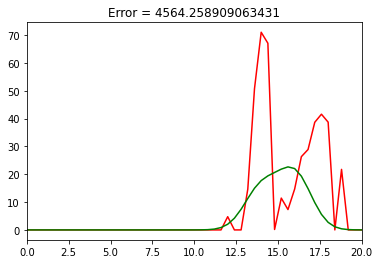

In [ ]:
f1_test = torch.from_numpy(test)
q_simulated = model(f1_test).detach().numpy()
q_model = np.zeros(N_sp + 1)
x_sp_mesh = x_mesh[::sparsity_coeff]
plt.plot(x_sp_mesh, q_simulated[0], 'r')
h_sp = x_sp_mesh[1] - x_sp_mesh[0]
q_model = 15 * np.exp(-(x_sp_mesh-14)**2/2) + 20 * np.exp(-(x_sp_mesh-16)**2/2)
error = np.abs(np.sum((q_model - q_simulated)**2 * h_sp))
plt.plot(x_sp_mesh, q_model, 'g')
plt.title("Error = {}".format(error))
# plt.ylim((0,25))
plt.xlim((0,20))

#U-Net


In [ ]:
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import time
from tqdm.notebook import tqdm
import torch.optim as optim
import wandb

wandb.login()
plt.style.use('seaborn-pastel')



gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
print(torch.backends.cudnn.deterministic == True)
print(torch.backends.cudnn.benchmark == False)

T = 20
t_0 = 0
M = 1000
N = 1000
epsilon = 10**(-2)
tau = (T - t_0)/M
t = np.arange(t_0, T, tau)
t = np.append(t, T)
a = 0
b = 20
h = (b - a)/N
x_mesh = np.arange(a, b, h)
x_mesh = np.append(x_mesh, b)


data_size = 100000
test_data_size = 20000
val_data_size = 20000
q = np.zeros((data_size, N + 1))


file_q = open('/content/drive/My Drive/Biophys/q_100k.txt','r')
for i in range(data_size):
    s = 0
    line = file_q.readline()
    for num in line.split("\t"):
        if num != '\n':
            q[i, s] = float(num)
        s = s + 1

file_q.close()
y = q
print('q readed')


q_test = np.zeros((test_data_size, N + 1))
file_q = open('/content/drive/My Drive/Biophys/q_20k_exp_test.txt','r')
for i in range(test_data_size):
    s = 0
    line = file_q.readline()
    for num in line.split("\t"):
        if num != '\n':
            q_test[i, s] = float(num)
        s = s + 1

file_q.close()
y_test = q_test
print('q test readed')

f2 = np.zeros((data_size, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_1.txt','r')
for i in range(int(data_size/4)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_1 readed')
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_2.txt','r')
for i in range(int(data_size/4),int(data_size/2)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_2 readed')
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_3.txt','r')
for i in range(int(data_size/2),int(3*data_size/4)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_3 readed')
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_4.txt','r')
for i in range(int(3*data_size/4),int(data_size)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_2 readed')
x = f2

f2_test = np.zeros((test_data_size, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_exp_20k.txt','r')
for i in range(int(test_data_size)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2_test[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_test readed')
x_test = f2_test

f2_val = np.zeros((val_data_size, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_exp_val_20k.txt','r')
for i in range(int(val_data_size)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2_val[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_val readed')
x_val = f2_val

f2_q_zeros = np.zeros((1, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_q_zeros.txt','r')
for d in range(3):
  s = 0
  line = file_f2.readline()
  for num in line.split("\t"):
      if num != '\n':
          f2_q_zeros[0, d, s] = float(num)
      s = s + 1

file_f2.close()

print('f2_q_zeros readed')
x[:,0,:] = x[:,0,:] - f2_q_zeros[0, 0, :]
x[:,1,:] = x[:,1,:] - f2_q_zeros[0, 1, :]
x[:,2,:] = x[:,2,:] - f2_q_zeros[0, 2, :]
x_test[:,0,:] = x_test[:,0,:] - f2_q_zeros[0, 0, :]
x_test[:,1,:] = x_test[:,1,:] - f2_q_zeros[0, 1, :]
x_test[:,2,:] = x_test[:,2,:] - f2_q_zeros[0, 2, :]
x_val[:,0,:] = x_val[:,0,:] - f2_q_zeros[0, 0, :]
x_val[:,1,:] = x_val[:,1,:] - f2_q_zeros[0, 1, :]
x_val[:,2,:] = x_val[:,2,:] - f2_q_zeros[0, 2, :]

y_val = np.log( (y_val + k_norm) /k_norm)
y_test = np.log( (y_test + k_norm) /k_norm)
y = np.log( (y + k_norm) /k_norm)

In [ ]:
f2_1_mean = x[:,0,:].mean()
f2_2_mean = x[:,1,:].mean()
f2_3_mean = x[:,2,:].mean()
f2_1_std = x[:,0,:].std()
f2_2_std = x[:,1,:].std()
f2_3_std = x[:,2,:].std()
print(f2_1_mean, f2_2_mean, f2_3_mean, f2_1_std, f2_2_std, f2_3_std)
x[:,0,:] = (x[:,0,:] - f2_1_mean)/f2_1_std
x[:,1,:] = (x[:,1,:] - f2_2_mean)/f2_2_std
x[:,2,:] = (x[:,2,:] - f2_3_mean)/f2_3_std

0.3564184262238815 2.3444886298148595 0.7006606682996571 0.5160014905053804 2.278623266382888 0.9046180718233946


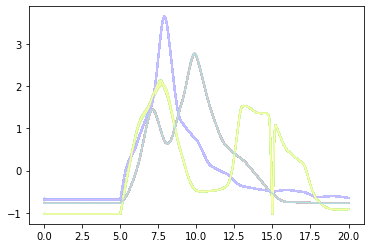

In [ ]:
for i in range(100):
  plt.plot(t, x[i, 0, :])
  plt.plot(t, x[i, 1, :])
  plt.plot(t, x[i, 2, :])

In [ ]:
x = f2
x[:,0,:] = x[:,0,:] - f2_q_zeros[0, 0, :]
x[:,1,:] = x[:,1,:] - f2_q_zeros[0, 1, :]
x[:,2,:] = x[:,2,:] - f2_q_zeros[0, 2, :]

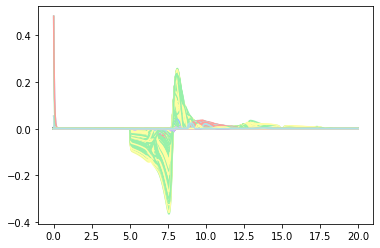

In [ ]:
for i in range(1000):
  plt.plot(t, x[i, 0, :])
  plt.plot(t, x[i, 1, :])
  plt.plot(t, x[i, 2, :])

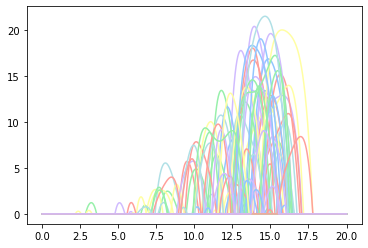

In [ ]:
for i in range(100):
  plt.plot(x_mesh, q[i,:])

In [ ]:
wandb.finish()
FLAGS = {}
filepath = r"/content/drive/My Drive/Biophys/model_U-Net.txt"
FLAGS['batch_size'] = 256
FLAGS['learning_rate'] = 0.0001
FLAGS['num_epochs'] = 500
wandb.init(
      # Set the project where this run will be logged
      project="Bio",
      entity="goraled",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"Low deep",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": FLAGS['learning_rate'],
      "architecture": "Not deep",
      "dataset": "K = 50.000",
      "epochs": FLAGS['num_epochs'],
      "batch_size": FLAGS['batch_size']
      })

In [ ]:
class Unet(nn.Module):
    def __init__(self, start_filters = 16, in_channels = 3):
        super().__init__()
        self.block1 = BasicBlock(in_channels, start_filters)
        self.pool1 = nn.MaxPool1d(2)
        self.block2 = BasicBlock(start_filters, start_filters * 2)
        self.pool2 = nn.MaxPool1d(2)
        self.block3 = BasicBlock(start_filters * 2,start_filters * 4)
        self.pool3 = nn.MaxPool1d(2)
        self.block4 = BasicBlock(start_filters * 4,start_filters * 4)
        self.up1 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters * 4, start_filters * 4, kernel_size=2, padding = 'same'))
        self.up2 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters * 2, start_filters * 2, kernel_size=2, padding = 'same'))
        self.up3 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters, start_filters, kernel_size=2, padding = 'same'))
        self.block5 = BasicBlock(start_filters * 8,start_filters * 2)
        self.block6 = BasicBlock(start_filters * 4,start_filters)
        self.block7 = BasicBlock(start_filters * 2, start_filters)
        self.result = nn.Conv1d(start_filters, 1, kernel_size = 1)

    def forward(self, x):
      out1 = self.block1(x)
      out_pool1 = self.pool1(out1)

      out2 = self.block2(out_pool1)
      out_pool2 = self.pool2(out2)

      out3 = self.block3(out_pool2)
      out_pool3 = self.pool2(out3)
      out4 = self.block4(out_pool3)
      out_up1 = self.up1(out4)
      out_cat1 = torch.cat((out_up1, out3), dim=1)
      out5 = self.block5(out_cat1)
      out_up2 = self.up2(out5)
      # out_up2 = self.up2(out3)
      # print(out_up2.shape)
      out_cat2 = torch.cat((out_up2, out2), dim=1)
      out6 = self.block6(out_cat2)
      out_up3 = self.up3(out6)
      # print(out_up3.shape)
      # print(out1.shape)
      out_cat3 = torch.cat((out_up3, out1), dim=1) # <-------
      out = self.block7(out_cat3)
      out = self.result(out)
      # print(out.shape)
      return out

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):  # You can add params here
        super(BasicBlock, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv1d(in_channels, out_channels,
                                      kernel_size = 3, padding = 'same')

        self.conv2 = nn.Conv1d(out_channels, out_channels,
                                      kernel_size = 3, padding = 'same')


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        # print(x.shape)
        x = self.conv2(x)
        # print(x.shape)
        x = self.relu(x)

        return x

In [ ]:
class Unet(nn.Module):
    def __init__(self, start_filters = 16, in_channels = 3):
        super().__init__()
        self.block1 = BasicBlock(in_channels, start_filters)
        self.pool1 = nn.MaxPool1d(2)
        self.block2 = BasicBlock(start_filters, start_filters * 2)
        self.pool2 = nn.MaxPool1d(2)
        self.block3 = BasicBlock(start_filters * 2,start_filters * 2)
        self.block4 = BasicBlock(start_filters * 4,start_filters * 4)
        self.up1 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters * 4, start_filters * 4, kernel_size=2, padding = 'same'))
        self.up2 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters * 2, start_filters * 2, kernel_size=2, padding = 'same'))
        self.up3 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters, start_filters, kernel_size=2, padding = 'same'))
        self.block5 = BasicBlock(start_filters * 8,start_filters * 2)
        self.block6 = BasicBlock(start_filters * 4,start_filters)
        self.block7 = BasicBlock(start_filters * 2, start_filters)
        self.result = nn.Conv1d(start_filters, 1, kernel_size = 1)
        # print(start_filters * 16)

    def forward(self, x):
      out1 = self.block1(x)
      out_pool1 = self.pool1(out1)

      out2 = self.block2(out_pool1)
      out_pool2 = self.pool2(out2)

      out3 = self.block3(out_pool2)
      out_up2 = self.up2(out3)
      out_cat2 = torch.cat((out_up2, out2), dim=1)
      out6 = self.block6(out_cat2)
      out_up3 = self.up3(out6)
      out_cat3 = torch.cat((out_up3, out1), dim=1) # <-------
      out = self.block7(out_cat3)
      out = self.result(out)
      # print(out.shape)
      return out

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):  # You can add params here
        super(BasicBlock, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv1d(in_channels, out_channels,
                                      kernel_size = 3, padding = 'same')

        self.conv2 = nn.Conv1d(out_channels, out_channels,
                                      kernel_size = 3, padding = 'same')


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        # print(x.shape)
        x = self.conv2(x)
        # print(x.shape)
        x = self.relu(x)

        return x

In [ ]:
torch.manual_seed(42)


X_train = torch.from_numpy(x[0:int(data_size * 0.8), :, :N])
X_test = torch.from_numpy(x[int(data_size * 0.8):data_size, :, :N])
Y_train = torch.from_numpy(y[0:int(data_size * 0.8), :N])
Y_test = torch.from_numpy(y[int(data_size * 0.8):data_size, :N])
print(Y_train.size())
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=FLAGS['batch_size'],
    drop_last=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle=False,
    drop_last=True)


lr = FLAGS['learning_rate']
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)



model = Unet()
model.double()
# model.load_state_dict(torch.load(filepath), strict=False)
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()


torch.Size([40000, 1000])
Device cuda


In [ ]:
def train_model(model, optimizer, data_loader, loss_module, data_val_loader, num_epochs=4000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        model_func_loss = 0
        val_total_samples = 0
        val_loss = 0
        data_loss = 0
        data_total_samples = 0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels)
            data_loss += loss.detach().cpu().item()
            data_total_samples += data_inputs.size()[0]
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()


        model.eval()
        for val_data, val_target in data_val_loader:

            val_data = val_data.to(device)
            val_target = val_target.to(device)

            val_preds = model(val_data)
            val_loss += loss_fn(val_preds, val_target).detach().cpu().item()
            val_total_samples += val_data.size()[0]

        wandb.log({"loss": data_loss/data_total_samples,
                   "val_loss": val_loss/val_total_samples})


        model.train()
        # wandb.watch(model)
        if epoch % 100 == 0:
            torch.save(model.state_dict(), filepath)





train_model(model, optimizer, train_loader, loss_fn, test_loader, FLAGS['num_epochs'])
wandb.finish()

  0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/conv.py:309: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:895.)
  return F.conv1d(input, weight, bias, self.stride,
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([256, 1000])) that is different to the input size (torch.Size([256, 1, 1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


KeyboardInterrupt: ignored

#LSTM - Unet



In [ ]:
!pip install wandb -qU
!pip install lion-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import time
from tqdm.notebook import tqdm
import torch.optim as optim
import wandb
k_norm = 1.84835308
wandb.login()
plt.style.use('seaborn-pastel')



gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
print(torch.backends.cudnn.deterministic == True)
print(torch.backends.cudnn.benchmark == False)

T = 20
t_0 = 0
M = 1000
N = 1000
epsilon = 10**(-2)
tau = (T - t_0)/M
t = np.arange(t_0, T, tau)
t = np.append(t, T)
a = 0
b = 20
h = (b - a)/N
x_mesh = np.arange(a, b, h)
x_mesh = np.append(x_mesh, b)

data_size = 100000
test_data_size = 20000
val_data_size = 20000
q = np.zeros((data_size, N + 1))


file_q = open('/content/drive/My Drive/Biophys/q_100k.txt','r')
for i in range(data_size):
    s = 0
    line = file_q.readline()
    for num in line.split("\t"):
        if num != '\n':
            q[i, s] = float(num)
        s = s + 1

file_q.close()
y = q
print('q readed')


q_test = np.zeros((test_data_size, N + 1))
file_q = open('/content/drive/My Drive/Biophys/q_20k_exp_test.txt','r')
for i in range(test_data_size):
    s = 0
    line = file_q.readline()
    for num in line.split("\t"):
        if num != '\n':
            q_test[i, s] = float(num)
        s = s + 1

file_q.close()
y_test = q_test
print('q test readed')

f2 = np.zeros((data_size, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_1.txt','r')
for i in range(int(data_size/4)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_1 readed')
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_2.txt','r')
for i in range(int(data_size/4),int(data_size/2)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_2 readed')
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_3.txt','r')
for i in range(int(data_size/2),int(3*data_size/4)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_3 readed')
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_4.txt','r')
for i in range(int(3*data_size/4),int(data_size)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_2 readed')
x = f2

f2_test = np.zeros((test_data_size, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_exp_20k.txt','r')
for i in range(int(test_data_size)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2_test[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_test readed')
x_test = f2_test

f2_val = np.zeros((val_data_size, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_exp_val_20k.txt','r')
for i in range(int(val_data_size)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2_val[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_val readed')
x_val = f2_val

f2_q_zeros = np.zeros((1, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_q_zeros.txt','r')
for d in range(3):
  s = 0
  line = file_f2.readline()
  for num in line.split("\t"):
      if num != '\n':
          f2_q_zeros[0, d, s] = float(num)
      s = s + 1

file_f2.close()

print('f2_q_zeros readed')
x[:,0,:] = x[:,0,:] - f2_q_zeros[0, 0, :]
x[:,1,:] = x[:,1,:] - f2_q_zeros[0, 1, :]
x[:,2,:] = x[:,2,:] - f2_q_zeros[0, 2, :]
x_test[:,0,:] = x_test[:,0,:] - f2_q_zeros[0, 0, :]
x_test[:,1,:] = x_test[:,1,:] - f2_q_zeros[0, 1, :]
x_test[:,2,:] = x_test[:,2,:] - f2_q_zeros[0, 2, :]
x_val[:,0,:] = x_val[:,0,:] - f2_q_zeros[0, 0, :]
x_val[:,1,:] = x_val[:,1,:] - f2_q_zeros[0, 1, :]
x_val[:,2,:] = x_val[:,2,:] - f2_q_zeros[0, 2, :]

y_val = np.log( (y_val + k_norm) /k_norm)
y_test = np.log( (y_test + k_norm) /k_norm)
y = np.log( (y + k_norm) /k_norm)

Mounted at /content/drive


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
<ipython-input-2-5a1000199fe2>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Is the GPU available? False
True
True
q readed
q test readed
f2_1 readed
f2_2 readed
f2_test readed
f2_q_zeros readed


In [ ]:
wandb.finish()
FLAGS = {}
filepath = r"/content/drive/My Drive/Biophys/model_U-Net_norm_modLoss_lion.txt"
FLAGS['batch_size'] = 128
FLAGS['learning_rate'] = 0.0001
FLAGS['num_epochs'] = 500
wandb.init(
      # Set the project where this run will be logged
      project="Bio",
      entity="goraled",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"LSTM Unet is = 3 lr / 10 hs = 64 val exp batch_size = 128",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": FLAGS['learning_rate'],
      "architecture": "Deep val exp",
      "dataset": "K = 50.000",
      "epochs": FLAGS['num_epochs'],
      "batch_size": FLAGS['batch_size']
      })

wandb: Currently logged in as: goraled. Use `wandb login --relogin` to force relogin


In [ ]:
torch.set_default_dtype(torch.float64)
class LSTM_Unet(nn.Module):
    def __init__(self, start_filters = 16, in_channels = 1):
        super().__init__()
        self.h_sz = 64
        self.start_filters = start_filters
        self.lstm = nn.LSTM(input_size=3, hidden_size=self.h_sz, batch_first=True)
        self.block1 = BasicBlock(in_channels, start_filters)
        self.pool1 = nn.MaxPool1d(2)
        self.block2 = BasicBlock(start_filters, start_filters * 2)
        self.pool2 = nn.MaxPool1d(2)
        self.block3 = BasicBlock(start_filters * 2,start_filters * 4)
        self.pool3 = nn.MaxPool1d(2)
        self.block4 = BasicBlock(start_filters * 4,start_filters * 4)
        # Попробовать 2 слоя lstm, а потом upsample и conv
        self.up1 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters * 4, start_filters * 4, kernel_size=2, padding = 'same'))
        self.up2 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters * 2, start_filters * 2, kernel_size=2, padding = 'same'))
        self.up3 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters, start_filters, kernel_size=2, padding = 'same'))
        self.block5 = BasicBlock(start_filters * 8,start_filters * 2)
        self.block6 = BasicBlock(start_filters * 4,start_filters)
        self.block7 = BasicBlock(start_filters * 2, start_filters)
        self.result = nn.Linear(start_filters * self.h_sz, N)

    def forward(self, x):
      # print(x.type)
      # x = torch.permute(x, (0, 2, 1))
      out, (h, _) = self.lstm(x)
      # print(h.shape)
      # Проверить reshape и поменять, если что на permute
      # Проверить сколько весов в сетке
      # Добавить графики с предсказаниями модели на примерах
      # print(h.shape)
      h = torch.permute(h, (1, 0, 2))
      # print(h.shape)
      out1 = self.block1(h)
      out_pool1 = self.pool1(out1)

      out2 = self.block2(out_pool1)
      out_pool2 = self.pool2(out2)

      out3 = self.block3(out_pool2)
      out_pool3 = self.pool2(out3)
      out4 = self.block4(out_pool3)
      out_up1 = self.up1(out4)
      out_cat1 = torch.cat((out_up1, out3), dim=1)
      out5 = self.block5(out_cat1)
      out_up2 = self.up2(out5)
      # out_up2 = self.up2(out3)
      # print(out_up2.shape)
      out_cat2 = torch.cat((out_up2, out2), dim=1)
      out6 = self.block6(out_cat2)
      out_up3 = self.up3(out6)
      # print(out_up3.shape)
      # print(out1.shape)
      out_cat3 = torch.cat((out_up3, out1), dim=1) # <-------
      out = self.block7(out_cat3) #[batch, filters, h_sz]
      out = torch.flatten(out, start_dim=1)
      # out = torch.reshape(out, (FLAGS['batch_size'], self.start_filters * self.h_sz))
      out = self.result(out)
      # print(out.shape)
      return out

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):  # You can add params here
        super(BasicBlock, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv1d(in_channels, out_channels,
                                      kernel_size = 3, padding = 'same')

        self.conv2 = nn.Conv1d(out_channels, out_channels,
                                      kernel_size = 3, padding = 'same')


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        # print(x.shape)
        x = self.conv2(x)
        # print(x.shape)
        x = self.relu(x)

        return x

In [ ]:
from lion_pytorch import Lion
torch.manual_seed(42)


X_train = torch.from_numpy(x[:, :, :N])
X_test = torch.from_numpy(x_test[:, :, :N])
Y_train = torch.from_numpy(y[:, :N])
Y_test = torch.from_numpy(y_test[:, :N])

X_train = torch.permute(X_train, (0, 2, 1))
X_test = torch.permute(X_test, (0, 2, 1))
print(X_train.size())
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle = True,
    drop_last=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle=True,
    drop_last=True)


lr = FLAGS['learning_rate']
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)
class ModifiedMSELoss(nn.Module):
    def __init__(self, constant):
        super(ModifiedMSELoss, self).__init__()
        self.constant = constant
        self.mse_loss = nn.MSELoss()

    def forward(self, inputs, targets):
        mse = self.mse_loss(inputs, targets)
        modified_loss = mse + self.constant/(0.0001 + torch.sum(inputs**2))
        return modified_loss


model = LSTM_Unet()
model.double()
# model.load_state_dict(torch.load(filepath), strict=False)
model.to(device)

optimizer = Lion(model.parameters(), lr=1e-4, weight_decay=1e-2)
loss_fn = ModifiedMSELoss(1)
loss_fn2 = nn.MSELoss()

torch.Size([50000, 1000, 3])
Device cpu


In [ ]:
def train_model(model, optimizer, data_loader, loss_module, data_val_loader, num_epochs=4000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        model_func_loss = 0
        val_total_samples = 0
        val_loss = 0
        data_loss = 0
        data_total_samples = 0
        data_mse = 0
        val_mse = 0
        for data_inputs, data_labels in tqdm(data_loader):
            # data_inputs = torch.reshape(data_inputs, (FLAGS['batch_size'], 1000, 3))

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            # print(preds.shape)
            # print(data_labels.shape)
            # preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels)
            data_mse += loss_fn2(preds, data_labels).detach().cpu().item()
            data_loss += loss.detach().cpu().item()
            data_total_samples += data_inputs.size()[0]
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()


        model.eval()
        for val_data, val_target in data_val_loader:
            # val_data = torch.reshape(val_data, (FLAGS['batch_size'], 1000, 3))
            val_data = val_data.to(device)
            val_target = val_target.to(device)

            val_preds = model(val_data)
            val_mse = loss_fn2(val_preds, val_target).detach().cpu().item()
            val_loss += loss_fn(val_preds, val_target).detach().cpu().item()
            val_total_samples += val_data.size()[0]

        wandb.log({"mse_loss": data_mse/data_total_samples,
                   "mse_val_loss": val_mse/val_total_samples,
                   "loss": data_loss/data_total_samples,
                   "val_loss": val_loss/val_total_samples})


        model.train()
        # wandb.watch(model)
        if epoch % 5 == 0:
            torch.save(model.state_dict(), filepath)





train_model(model, optimizer, train_loader, loss_fn, test_loader, FLAGS['num_epochs'])
wandb.finish()

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

In [ ]:
torch.set_default_dtype(torch.float64)
class LSTM_Unet(nn.Module):
    def __init__(self, start_filters = 16, in_channels = 1):
        super().__init__()
        self.h_sz = 1000
        self.start_filters = start_filters
        self.lstm = nn.LSTM(input_size=3, hidden_size=self.h_sz, batch_first=True)
        self.block1 = BasicBlock(in_channels, start_filters)
        self.pool1 = nn.MaxPool1d(2)
        self.block2 = BasicBlock(start_filters, start_filters * 2)
        self.pool2 = nn.MaxPool1d(2)
        self.block3 = BasicBlock(start_filters * 2,start_filters * 4)
        self.pool3 = nn.MaxPool1d(2)
        self.block4 = BasicBlock(start_filters * 4,start_filters * 4)
        # Попробовать 2 слоя lstm, а потом upsample и conv
        self.up1 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters * 4, start_filters * 4, kernel_size=2, padding = 'same'))
        self.up2 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters * 2, start_filters * 2, kernel_size=2, padding = 'same'))
        self.up3 = nn.Sequential(
            nn.Upsample(mode='linear', scale_factor=2),
            nn.Conv1d(start_filters, start_filters, kernel_size=2, padding = 'same'))
        self.block5 = BasicBlock(start_filters * 8,start_filters * 2)
        self.block6 = BasicBlock(start_filters * 4,start_filters)
        self.block7 = BasicBlock(start_filters * 2, start_filters)
        self.result = nn.Linear(start_filters * self.h_sz, N)

    def forward(self, x):
      # print(x.type)
      x = torch.permute(x, (0, 2, 1))
      out, (h, _) = self.lstm(x)
      # print(h.shape)
      # Убрать
      h = torch.permute(h, (0, 2, 1))
      out1 = self.block1(h)
      out_pool1 = self.pool1(out1)

      out2 = self.block2(out_pool1)
      out_pool2 = self.pool2(out2)

      out3 = self.block3(out_pool2)
      out_pool3 = self.pool2(out3)
      out4 = self.block4(out_pool3)
      out_up1 = self.up1(out4)
      out_cat1 = torch.cat((out_up1, out3), dim=1)
      out5 = self.block5(out_cat1)
      out_up2 = self.up2(out5)
      # out_up2 = self.up2(out3)
      # print(out_up2.shape)
      out_cat2 = torch.cat((out_up2, out2), dim=1)
      out6 = self.block6(out_cat2)
      out_up3 = self.up3(out6)
      # print(out_up3.shape)
      # print(out1.shape)
      out_cat3 = torch.cat((out_up3, out1), dim=1) # <-------
      out = self.block7(out_cat3)
      out = torch.reshape(out, (FLAGS['batch_size'], self.start_filters * self.h_sz))
      out = self.result(out)
      # print(out.shape)
      return out

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):  # You can add params here
        super(BasicBlock, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv1d(in_channels, out_channels,
                                      kernel_size = 3, padding = 'same')

        self.conv2 = nn.Conv1d(out_channels, out_channels,
                                      kernel_size = 3, padding = 'same')


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        # print(x.shape)
        x = self.conv2(x)
        # print(x.shape)
        x = self.relu(x)

        return x
model = LSTM_Unet()
model.double()
model.load_state_dict(torch.load(filepath, map_location=torch.device('cpu')), strict=False)


<All keys matched successfully>

<built-in method type of Tensor object at 0x7fa7e0798900>


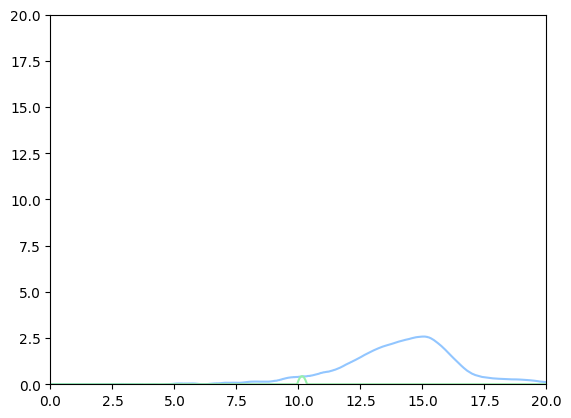

<built-in method type of Tensor object at 0x7fa7e06f6590>


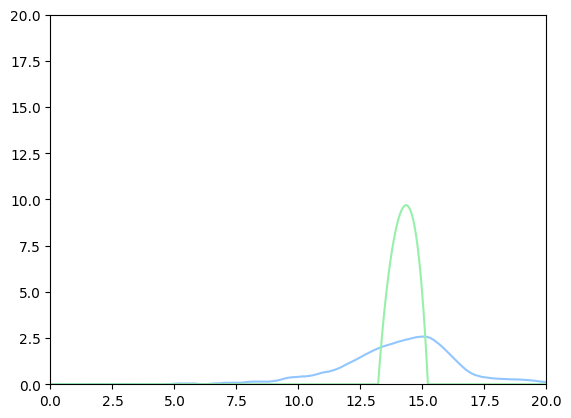

<built-in method type of Tensor object at 0x7fa7e06f6590>


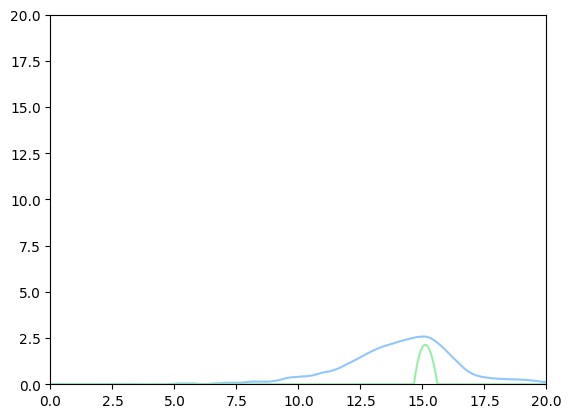

<built-in method type of Tensor object at 0x7fa7e0a349a0>


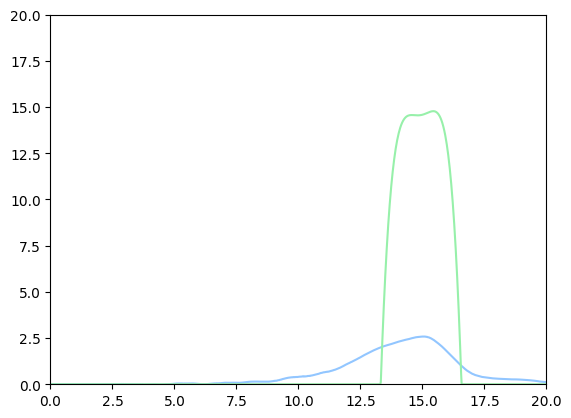

<built-in method type of Tensor object at 0x7fa7e0cf4c20>


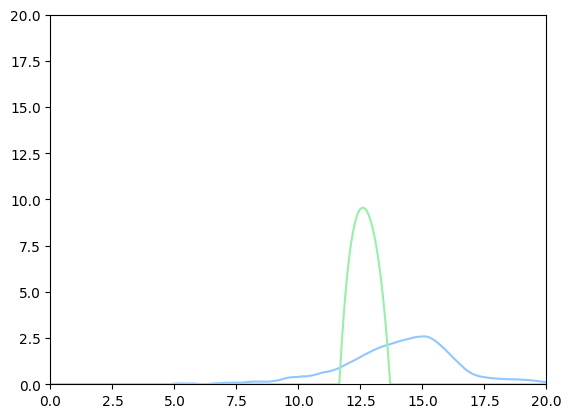

<built-in method type of Tensor object at 0x7fa7f27f5b80>


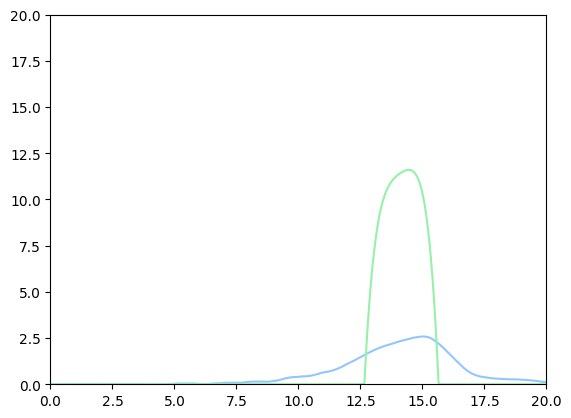

<built-in method type of Tensor object at 0x7fa7f27f5b80>


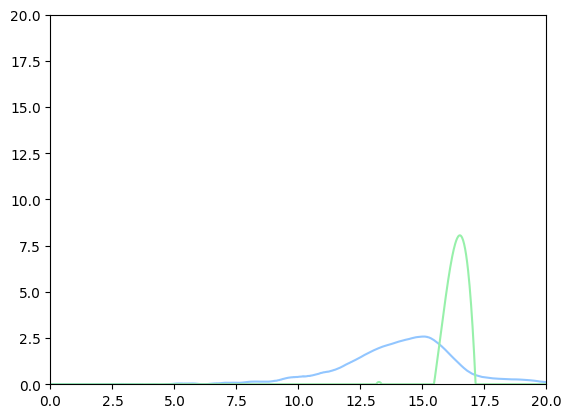

<built-in method type of Tensor object at 0x7fa7f27f5b80>


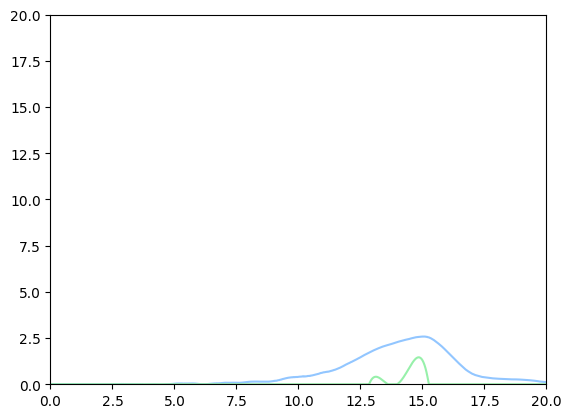

<built-in method type of Tensor object at 0x7fa7f27f5b80>


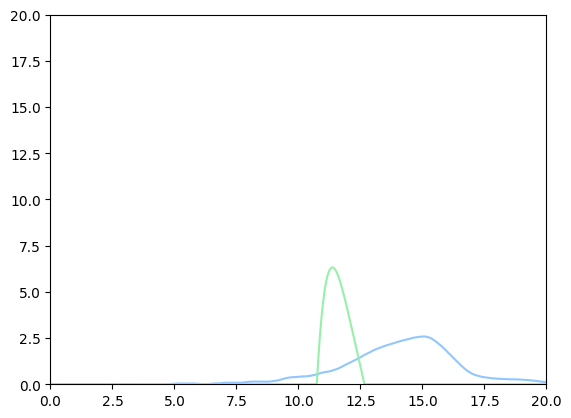

<built-in method type of Tensor object at 0x7fa7f27f5b80>


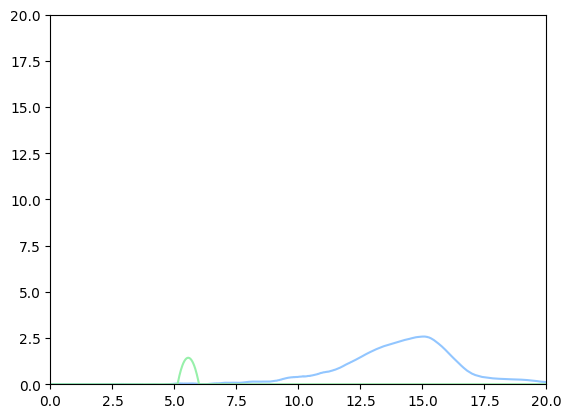

In [ ]:
for i in range(100,110):
    plt.plot(x_mesh[:N], model(torch.from_numpy(x[0:256, :, :N]))[i].detach().numpy())
    plt.plot(x_mesh,torch.from_numpy(y[0:256])[i])
    plt.axis([0, 20, 0, 20])
    plt.show()


plt.show()

(0.0, 20.0)

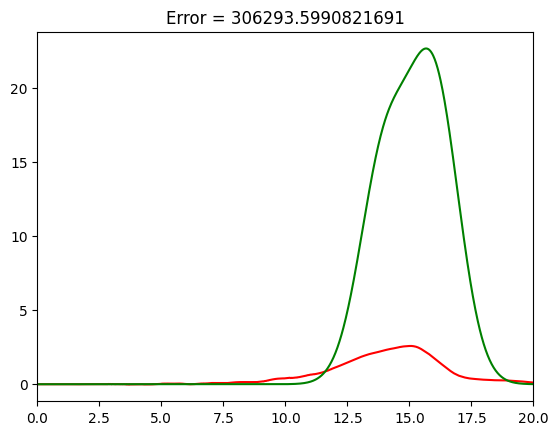

In [ ]:
f1_test = torch.from_numpy(x_test)
q_simulated = model(f1_test[0:256,:,:N]).detach().numpy()
q_model = np.zeros(N + 1)
x_sp_mesh = x_mesh
plt.plot(x_sp_mesh[:N], q_simulated[0], 'r')
h_sp = x_sp_mesh[1] - x_sp_mesh[0]
q_model = 15 * np.exp(-(x_sp_mesh-14)**2/2) + 20 * np.exp(-(x_sp_mesh-16)**2/2)
error = np.abs(np.sum((q_model[:N] - q_simulated)**2 * h_sp))
plt.plot(x_sp_mesh, q_model, 'g')
plt.title("Error = {}".format(error))
# plt.ylim((0,25))
plt.xlim((0,20))

In [ ]:
x_test.shape

(20000, 3, 1001)

In [ ]:

model = LSTM_Unet()
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp
print(get_n_params(model))

NameError: ignored

In [ ]:

model = LSTM_Unet()
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp
print(get_n_params(model))

1123944


torch.Size([256, 3, 1000])


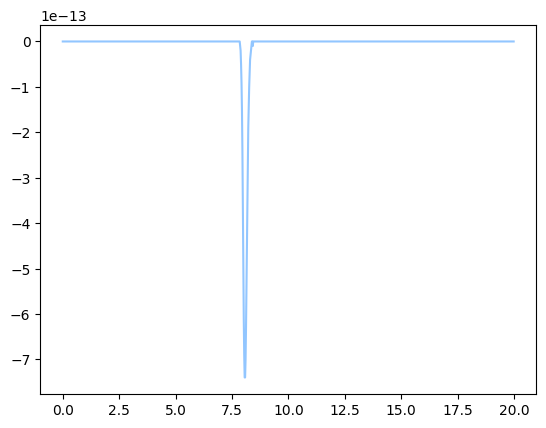

In [ ]:
test = torch.tensor(x[0:256,:,:N])
print(test.shape)
plt.plot(x_mesh[:N], test[0,0,:].numpy())
test = torch.reshape(test, (FLAGS['batch_size'], 1000, 3))


torch.Size([256, 1000, 3])


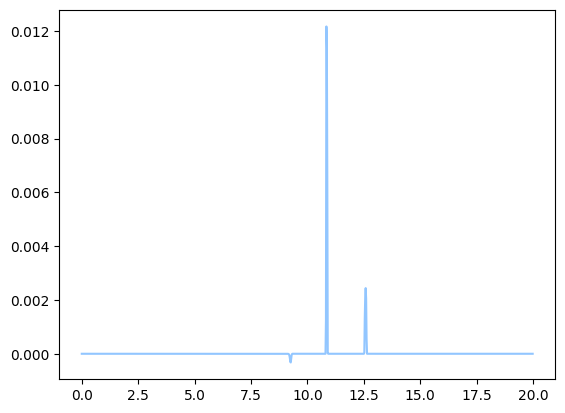

In [ ]:
print(test.shape)
plt.plot(x_mesh[:N], test[0,:,0].numpy())

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Biophys/Ranger21-main/ranger21/')
from Ranger21 import Ranger21

# TCN модель


In [ ]:
!pip install wandb -qU
!pip install lion-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lessw2020/Ranger21.git to /tmp/pip-req-build-c6h3gf9c
  Running command git clone --filter=blob:none --quiet https://github.com/lessw2020/Ranger21.git /tmp/pip-req-build-c6h3gf9c
  Resolved https://github.com/lessw2020/Ranger21.git to commit 1a96777278cdd14bc11afd865112724386d26a44
  Preparing metadata (setup.py) ... done
  Created wheel for ranger21: filename=ranger21-0.0.1-py3-none-any.whl size=24712 sha25

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import time
from tqdm.notebook import tqdm
import torch.optim as optim
import wandb

wandb.login()
plt.style.use('seaborn-pastel')



gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
print(torch.backends.cudnn.deterministic == True)
print(torch.backends.cudnn.benchmark == False)

k_norm = 1.84835308
T = 20
t_0 = 0
M = 1000
N = 1000
epsilon = 10**(-2)
tau = (T - t_0)/M
t = np.arange(t_0, T, tau)
t = np.append(t, T)
a = 0
b = 20
h = (b - a)/N
x_mesh = np.arange(a, b, h)
x_mesh = np.append(x_mesh, b)

data_size = 100000
test_data_size = 20000
val_data_size = 20000
q = np.zeros((data_size, N + 1))
# t0 = np.zeros((data_size, 1))
# t0_test = np.zeros((test_data_size, 1))
# file_t0 = open('/content/drive/My Drive/Biophys/t0_25k_1.txt','r')
# for i in range(int(data_size/2)):
#     line = file_t0.readline()
#     t0[i, 0] = float(line)

# file_t0.close()
# file_t0 = open('/content/drive/My Drive/Biophys/t0_25k_2.txt','r')
# for i in range(int(data_size/2),data_size):

#     line = file_t0.readline()
#     t0[i, 0] = float(line)

# file_t0.close()
# # print(t0[data_size - 1])
# file_t0 = open('/content/drive/My Drive/Biophys/t0_test.txt','r')
# for i in range(test_data_size):
#     s = 0
#     line = file_t0.readline()
#     t0_test[i, 0] = float(line)

# file_t0.close()
file_q = open('/content/drive/My Drive/Biophys/q_100k.txt','r')
for i in range(data_size):
    s = 0
    line = file_q.readline()
    for num in line.split("\t"):
        if num != '\n':
            q[i, s] = float(num)
        s = s + 1

file_q.close()
y = q
print('q readed')


q_test = np.zeros((test_data_size, N + 1))
file_q = open('/content/drive/My Drive/Biophys/q_20k_exp_test.txt','r')
for i in range(test_data_size):
    s = 0
    line = file_q.readline()
    for num in line.split("\t"):
        if num != '\n':
            q_test[i, s] = float(num)
        s = s + 1

file_q.close()
y_test = q_test
q_val = np.zeros((test_data_size, N + 1))
file_q = open('/content/drive/My Drive/Biophys/q_20k_exp_val.txt','r')
for i in range(test_data_size):
    s = 0
    line = file_q.readline()
    for num in line.split("\t"):
        if num != '\n':
            q_val[i, s] = float(num)
        s = s + 1

file_q.close()
y_val = q_val
print('q test/val readed')

f2 = np.zeros((data_size, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_1.txt','r')
for i in range(int(data_size/4)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_1 readed')
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_2.txt','r')
for i in range(int(data_size/4),int(data_size/2)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_2 readed')
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_3.txt','r')
for i in range(int(data_size/2),int(3*data_size/4)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_3 readed')
file_f2 = open('/content/drive/My Drive/Biophys/f2_25k_4.txt','r')
for i in range(int(3*data_size/4),int(data_size)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_2 readed')
x = f2

f2_test = np.zeros((test_data_size, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_exp_20k.txt','r')
for i in range(int(test_data_size)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2_test[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_test readed')
x_test = f2_test

f2_val = np.zeros((val_data_size, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_exp_val_20k.txt','r')
for i in range(int(val_data_size)):
  for d in range(3):
    s = 0
    line = file_f2.readline()
    for num in line.split("\t"):
        if num != '\n':
            f2_val[i, d, s] = float(num)
        s = s + 1

file_f2.close()
print('f2_val readed')
x_val = f2_val

f2_q_zeros = np.zeros((1, 3, M + 1))
file_f2 = open('/content/drive/My Drive/Biophys/f2_q_zeros.txt','r')
for d in range(3):
  s = 0
  line = file_f2.readline()
  for num in line.split("\t"):
      if num != '\n':
          f2_q_zeros[0, d, s] = float(num)
      s = s + 1

file_f2.close()

print('f2_q_zeros readed')
x[:,0,:] = x[:,0,:] - f2_q_zeros[0, 0, :]
x[:,1,:] = x[:,1,:] - f2_q_zeros[0, 1, :]
x[:,2,:] = x[:,2,:] - f2_q_zeros[0, 2, :]
x_test[:,0,:] = x_test[:,0,:] - f2_q_zeros[0, 0, :]
x_test[:,1,:] = x_test[:,1,:] - f2_q_zeros[0, 1, :]
x_test[:,2,:] = x_test[:,2,:] - f2_q_zeros[0, 2, :]
x_val[:,0,:] = x_val[:,0,:] - f2_q_zeros[0, 0, :]
x_val[:,1,:] = x_val[:,1,:] - f2_q_zeros[0, 1, :]
x_val[:,2,:] = x_val[:,2,:] - f2_q_zeros[0, 2, :]

y_val = np.log( (y_val + k_norm) /k_norm)
y_test = np.log( (y_test + k_norm) /k_norm)
y = np.log( (y + k_norm) /k_norm)

Mounted at /content/drive


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
<ipython-input-2-0c2cb19e057a>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Is the GPU available? True
True
True
q readed
q test readed
f2_1 readed
f2_2 readed
f2_test readed
f2_q_zeros readed


In [ ]:
f2_1_mean = np.mean(x[:,0,:], axis=0)
f2_2_mean = np.mean(x[:,1,:], axis=0)
f2_3_mean = np.mean(x[:,2,:], axis=0)
f2_1_std = np.std(x[:,0,:], axis=0)
f2_2_std = np.std(x[:,0,:], axis=0)
f2_3_std = np.std(x[:,0,:], axis=0)
print(f2_1_mean.shape)
x[:,0,:] = (x[:,0,:] - f2_1_mean)
x[:,1,:] = (x[:,1,:] - f2_2_mean)
x[:,2,:] = (x[:,2,:] - f2_3_mean)

In [ ]:

for i in range(100):
  plt.plot(x_mesh, y_test[i,:])
#LSTM Unet попробовать переобучить с нормализацией y + Lion + modLoss
#Попробовать поменять train и test местами

In [ ]:
y = q
y = np.log( (y + k_norm) /k_norm)
for i in range(100):
  plt.plot(x_mesh, y[i,:])

In [ ]:
q_norm = np.log( (q+k_norm)/k_norm )
for i in range(100):
  plt.plot(x_mesh, q_norm[i,:])


In [ ]:
for i in range(1000):
  plt.plot(t, x[i, 0, :])
  # plt.plot(t, x[i, 1, :])
  # plt.plot(t, x[i, 2, :])

In [ ]:
wandb.finish()
FLAGS = {}
filepath = r"/content/drive/My Drive/Biophys/TCN_final.txt"
FLAGS['batch_size'] = 128
FLAGS['learning_rate'] = 0.0001
FLAGS['num_epochs'] = 500
wandb.init(
      # Set the project where this run will be logged
      project="Bio",
      entity="goraled",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"TCN Sigmoid t0",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": FLAGS['learning_rate'],
      "kernel_size" : 4,
      "indent_base": 3,
      "architecture": "val exp",
      "dataset": "K = 50.000",
      "epochs": FLAGS['num_epochs'],
      "batch_size": FLAGS['batch_size']
      })

wandb: Currently logged in as: goraled. Use `wandb login --relogin` to force relogin


In [ ]:
torch.set_default_dtype(torch.float64)
class TCNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation, input_length, mode='identity'):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding='same', dilation=dilation),
            nn.BatchNorm1d(out_channels),
            nn.Sigmoid(),
            nn.Dropout1d(),
            nn.Conv1d(out_channels, out_channels, kernel_size, stride=1, padding='same', dilation=dilation),
            nn.BatchNorm1d(out_channels)
        )
        self.activation = nn.Sigmoid()
        if mode == 'identity':
            self.residual = nn.Identity()
        elif mode == 'input':
            self.residual = nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=1)
        elif mode == 'output':
            self.layers_stack[0] = nn.Conv1d(in_channels, in_channels, kernel_size, stride=1, padding='same', dilation=dilation)
            self.layers_stack[1] = nn.BatchNorm1d(in_channels)
            self.layers_stack[4] = nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding='same', dilation=dilation)
            self.residual = nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=1)

    def forward(self, x):
        layers_out = self.layers_stack(x)
        residual_out = self.residual(x)
        return self.activation(layers_out + residual_out)

class TCN(nn.Module):
    def __init__(self, input_dim=3, output_dim=1, input_length=1000, num_filters=16):
        super().__init__()
        indent_base = 3
        dilations = [indent_base**i for i in range(6)]
        kernel_size = 4
        in_block = TCNBlock(input_dim, num_filters, kernel_size, dilations[0], input_length, 'input')
        hidden_blocks = nn.Sequential(*[TCNBlock(num_filters, num_filters, kernel_size, dilation, input_length) for dilation in dilations[1:-1]])
        out_block = TCNBlock(num_filters, output_dim, kernel_size, dilations[-1], input_length, 'output')
        self.net = nn.Sequential(in_block, hidden_blocks, out_block)
        self.lin = nn.Linear(1001, 1000)

    def forward(self, x):
        x = self.net(x)
        # print(x.shape)
        # t0 = torch.reshape(t0, (128, 1, 1))
        # x = torch.cat((x, t0), dim=2)
        # print(x.shape)
        # x = self.lin(x)
        return x

In [ ]:
from lion_pytorch import Lion
# from Ranger21 import Ranger21
torch.manual_seed(42)

class ModifiedMSELoss(nn.Module):
    def __init__(self, constant):
        super(ModifiedMSELoss, self).__init__()
        self.constant = constant
        self.mse_loss = nn.MSELoss()

    def forward(self, inputs, targets):
        mse = self.mse_loss(inputs, targets)
        modified_loss = mse + self.constant/(0.0001 + torch.sum(inputs**2))
        return modified_loss

X_train = torch.from_numpy(x[:, :, :N])
X_test = torch.from_numpy(x_test[:, :, :N])
T_train = torch.from_numpy(t0[:, 0])
Y_train = torch.from_numpy(y[:, :N])
Y_test = torch.from_numpy(y_test[:, :N])
T_test = torch.from_numpy(t0_test[:, 0])
# X_train = torch.permute(X_train, (0, 2, 1))
# X_test = torch.permute(X_test, (0, 2, 1))
print(X_train.size())
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train, T_train)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test, T_test)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle = True,
    drop_last=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=FLAGS['batch_size'],
    shuffle=True,
    drop_last=True)


lr = FLAGS['learning_rate']
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)



model = TCN()
model.double()
# model.load_state_dict(torch.load(filepath), strict=False)
model.to(device)

# optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer = Lion(model.parameters(), lr=1e-4, weight_decay=1e-2)
loss_fn = ModifiedMSELoss(1)



torch.Size([50000, 3, 1000])
Device cuda


In [ ]:
print(X_test.shape, Y_test.shape, T_test.shape)

torch.Size([20000, 3, 1000]) torch.Size([20000, 1000]) torch.Size([20000])


In [ ]:
def train_model(model, optimizer, data_loader, loss_module, data_val_loader, num_epochs=4000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        model_func_loss = 0
        val_total_samples = 0
        val_loss = 0
        data_loss = 0
        data_total_samples = 0
        for data_inputs, data_labels, t_data in tqdm(data_loader):
            # data_inputs = torch.reshape(data_inputs, (FLAGS['batch_size'], 1000, 3))

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            t_data = t_data.to(device)
            ## Step 2: Run the model on the input data
            preds = model(data_inputs, t_data)
            # print(preds.shape)
            # print(data_labels.shape)
            # preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels)
            data_loss += loss.detach().cpu().item()
            data_total_samples += data_inputs.size()[0]
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()


        model.eval()
        for val_data, val_target, t_val in data_val_loader:
            # val_data = torch.reshape(val_data, (FLAGS['batch_size'], 1000, 3))6t
            val_target = val_target.to(device)
            val_data = val_data.to(device)
            t_val = t_val.to(device)
            val_preds = model(val_data, t_val)
            val_loss += loss_fn(val_preds, val_target).detach().cpu().item()
            val_total_samples += val_data.size()[0]

        wandb.log({"loss": data_loss/data_total_samples,
                   "val_loss": val_loss/val_total_samples})


        model.train()
        # wandb.watch(model)
        if epoch % 2 == 0:
            torch.save(model.state_dict(), filepath)





train_model(model, optimizer, train_loader, loss_fn, test_loader, FLAGS['num_epochs'])
wandb.finish()

In [ ]:
torch.set_default_dtype(torch.float64)

model =TCN()
model.double()
model.load_state_dict(torch.load(filepath, map_location=torch.device('cpu')), strict=False)
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp
print(get_n_params(model))

1013108


In [ ]:
for i in range(100,110):

    plt.plot(x_mesh[:N], model(torch.from_numpy(x[0:256, :, :N]))[i].detach().numpy()[0])
    plt.plot(x_mesh,torch.from_numpy(y[0:256])[i])
    plt.axis([0, 20, 0, 2])
    plt.show()


plt.show()
#sigmoid + lion + 1/norm in loss

In [ ]:
for i in range(0,256):

    plt.plot(x_mesh[:N], model(torch.from_numpy(x_test[0:256, :, :N]))[i].detach().numpy()[0])
    plt.plot(x_mesh,torch.from_numpy(y_test[0:256])[i])
    plt.axis([0, 20, 0, 2])
    plt.title(i)
    plt.show()


plt.show()
#test
#sigmoid + lion + 1/norm in loss

In [ ]:
file_1 = open("/content/drive/My Drive/Biophys/f_2_2.txt", "w")

file_2 = open("/content/drive/My Drive/Biophys/q_2.txt", "w")

file_3 = open("/content/drive/My Drive/Biophys/q_2_target.txt", "w")
x_to_save =  np.zeros((test_data_size, 3, M + 1))
x_to_save[:,0,:] = x_test[:,0,:] + f2_q_zeros[0, 0, :]
x_to_save[:,1,:] = x_test[:,1,:] + f2_q_zeros[0, 1, :]
x_to_save[:,2,:] = x_test[:,2,:] + f2_q_zeros[0, 2, :]
pred = model(torch.from_numpy(x_test[0:256, :, :]))[0].detach().numpy()[0];
pred = k_norm * np.exp(pred) - k_norm
target = k_norm * np.exp(y_test[0]) - k_norm
np.savetxt(file_1, x_to_save[0, :, :], delimiter='\t')

np.savetxt(file_2, pred, delimiter='\t')

np.savetxt(file_3, target , delimiter='\t')
file_1.close()
file_2.close()
file_3.close()

In [ ]:
plt.plot(x_mesh, target)

In [ ]:
for i in range(100,110):

    plt.plot(x_mesh[:N], model(torch.from_numpy(x[0:256, :, :N]))[i].detach().numpy()[0])
    plt.plot(x_mesh,torch.from_numpy(y[0:256])[i])
    plt.axis([0, 20, 0, 2])
    plt.show()


plt.show()
#softplus + lion + 1/norm in loss

In [ ]:
for i in range(100,110):

    plt.plot(x_mesh[:N], model(torch.from_numpy(x[0:256, :, :N]))[i].detach().numpy()[0])
    plt.plot(x_mesh,torch.from_numpy(y[0:256])[i])
    plt.axis([0, 20, 0, 2])
    plt.show()


plt.show()

In [ ]:
for i in range(100,110):

    plt.plot(x_mesh[:N], model(torch.from_numpy(x[0:256, :, :N]))[i].detach().numpy()[0])
    plt.plot(x_mesh,torch.from_numpy(y[0:256])[i])
    plt.axis([0, 20, 0, 2])
    plt.show()


plt.show()

In [ ]:
for i in range(100,110):

    plt.plot(x_mesh[:N], model(torch.from_numpy(x_test[0:256, :, :N]))[i].detach().numpy()[0])
    plt.plot(x_mesh,torch.from_numpy(y_test[0:256])[i])
    plt.axis([0, 20, 0, 2])
    plt.show()


plt.show()

In [ ]:
model(torch.from_numpy(x[0:256, :, :N]))[i].detach().numpy()[0]